# **Impact Assessment**

### Import processing and prepping libraries

In [1]:
pip install pymysql

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

import psycopg2
import pymysql

import datetime as dt

In [3]:
#import data processing libraries

import os
import pandas as pd
import numpy as np
import math as math
import datetime as dt
from scipy import stats

In [4]:
#import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [5]:
import pandas as pd
import numpy as np
import datetime

import psycopg2
import pymysql

from datetime import timedelta

In [6]:
import pandas as pd

import numpy as np

import seaborn

import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Load the Data

In [8]:
current_refresh = pd.read_parquet("/home/jupyter-jackline.ngenia/Limits_refresh_summary_20230112_multiple_products_2.parquet")
# current_refresh = current_refresh[['store_number', 'final_21_limit', 'final_7_limit', 'final_1_limit', 'max_global_limit', 'previous_21_limit', 'previous_7_limit', 'previous_1_limit', 'previous_max_global_limit']]

In [9]:
print(current_refresh.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69312 entries, 0 to 69311
Data columns (total 82 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   mobile_number                        69148 non-null  object        
 1   store_number                         69312 non-null  object        
 2   approx_30_days_trx_val               69312 non-null  float64       
 3   most_recent_trx_date_past_30_days    63583 non-null  datetime64[ns]
 4   last_trx_date                        63583 non-null  datetime64[ns]
 5   expected_trx_days                    69312 non-null  int64         
 6   actual_trx_days                      69312 non-null  int64         
 7   page_active_days                     69312 non-null  float64       
 8   inference_col                        69312 non-null  object        
 9   days_since_last_trx                  63583 non-null  float64       
 10  transacted

In [10]:
current_refresh[['final_21_limit', 'final_7_limit', 'final_1_limit']].sum()

final_21_limit    183042600
final_7_limit     355707000
final_1_limit     133889900
dtype: int64

In [11]:
current_refresh[current_refresh['store_number'] == '7234156']

,mobile_number,store_number,approx_30_days_trx_val,most_recent_trx_date_past_30_days,last_trx_date,expected_trx_days,actual_trx_days,page_active_days,inference_col,days_since_last_trx,transacted_last_5_days,weight_till_recency,national_id,idm_recommendation,idm_limit,is_iprs_validated,client_mobile_number,loan_count,loan_status,term_frequency,principal_disbursed,principal_repaid,disbursed_on_date,expected_matured_on_date,closed_on_date,due_date_fixed,days_past_due,bloom_version,loan_repayment_status,src_crdt_score,max_principal_amount,max_loan_disbursement_date,count_good_loans,good_loans_repayment_ratio,num_days_since_last_disbursement,weight_dpd,adjusted_loan_count,due_date_rm_ge_rm_1d,due_date_rm_ge_rm_add_back,rllvr_date_rm_ge_rm_add_back,repayments_by_dd_vs_principal_mean,repayments_by_erd_vs_principal_mean,max_global_limit,previous_max_global_limit,max_limit_diff,limit_factor_21,limit_factor_7,limit_factor_1,idm_factor_21,idm_factor_7,idm_factor_1,trading_consistency_bands,loan_count_bands,new_limit_factor_21,new_limit_factor_7,new_limit_factor_1,weight_good_loans_repayment_ratio,weight_consistency,weight_recency,risk_rules_factor,ultimate_factor_21,ultimate_factor_7,ultimate_factor_1,limit_21_day,limit_7_day,limit_1_day,adjusted_21_limit,adjusted_7_limit,adjusted_1_limit,final_21_limit,final_7_limit,final_1_limit,blacklist_flag,total_final_21_limit,total_final_7_limit,total_final_1_limit,total_max_global_limit,previous_21_limit,previous_7_limit,previous_1_limit,model_version,created_at
34953,254718341141,7234156,266016.517,2022-12-13,2023-01-11,30,30,1.000,No_rules_relaxed,0.000,Yes,1.000,38936199,Reject,0.000,True,254718341141,18,600.000,21.000,48100.000,48100.000,2022-11-13,2022-12-04,2022-12-02,2022-12-04,-2.000,2.000,closed_early_repayment,476.000,112700.000,2022-07-29,17.000,0.940,59.000,1,18,1,1,1,1.000,1.000,76900,0,76900,0.350,0.120,0.120,0.700,0.706,0.706,Band 7,Band 8,0.550,0.300,0.300,0.000,1.000,1,0.750,0.289,0.159,0.159,76812.269,42249.682,42249.682,76812.269,42249.682,42249.682,76900,42300,42300,0,1217500,710400,691100,1217500,0,0,0,"2022-007[2022-10-21, 2023-01-12]",2023-01-12 11:23:12


In [12]:
# def calc_final_21_limit(df):
    
#     final_21_limit = df['final_21_limit']
#     previous_21_limit = df['previous_21_limit']
    
#     if previous_21_limit == 0:
#         return 0
#     else:
#         return final_21_limit
    

# def calc_final_7_limit(df):
    
#     final_7_limit = df['final_7_limit']
#     previous_7_limit = df['previous_7_limit']
    
#     if previous_7_limit == 0:
#         return 0
#     else:
#         return final_7_limit
    
    
# def calc_final_1_limit(df):
    
#     final_1_limit = df['final_1_limit']
#     previous_1_limit = df['previous_1_limit']
    
#     if previous_1_limit == 0:
#         return 0
#     else:
#         return final_1_limit

In [13]:
# current_refresh['final_21_limit'] = current_refresh.apply(lambda x: calc_final_21_limit(x), axis = 1)
# current_refresh['final_7_limit'] = current_refresh.apply(lambda x: calc_final_7_limit(x), axis = 1)
# current_refresh['final_1_limit'] = current_refresh.apply(lambda x: calc_final_1_limit(x), axis = 1)
# current_refresh["max_global_limit"] = current_refresh[['final_21_limit', 'final_7_limit', 'final_1_limit']].max(axis=1)


# current_refresh[['final_21_limit', 'final_7_limit', 'final_1_limit', 'max_global_limit']].sum()

In [14]:
current_refresh['store_number'] = current_refresh['store_number'].astype(str)

### 2. Check impact on subsequent loan take-ups

In [15]:
host = '157.245.248.249'
port = int(5432)
dbname = 'ubuntu'
user = 'jacklinengenia'
password = 'x3MX&8#!'


def get_query_results_postgres():
    with psycopg2.connect(host = host,
                          port = port,
                          database = dbname,
                          user = user,
                          password = password) as conn:
        sql = 'SELECT * FROM bloomlive.loans_fact_table_materialized_summary_view where principal_disbursed > 0'
        df = pd.read_sql(sql, conn)
        
    return df

    conn.close()
    
if __name__ == "__main__":
    get_query_results_postgres()  

/tmp/ipykernel_277810/834827804.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


In [16]:
df_loans = get_query_results_postgres()

df_loans.head(3)

/tmp/ipykernel_277810/834827804.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


,loan_surrogate_id,loan_mifos_id,bloom_version,client_surrogate_id,client_mifos_id,client_mobile_number,product_surrogate_id,product_mifos_id,loan_officer_surrogate_id,loan_officer_mifos_id,loan_status,loan_account_number,loan_type,transaction_strategy,term_frequency,term_period_frequency,repay_every,principal_amount_proposed,principal_amount,principal_disbursed,principal_repaid,principal_written_off,principal_outstanding,interest_charged,interest_repaid,interest_waived,interest_written_off,interest_outstanding,fee_charges_charged,fee_charges_repaid,fee_charges_waived,fee_charges_written_off,fee_charges_outstanding,penalty_charges_charged,penalty_charges_repaid,penalty_charges_waived,penalty_charges_written_off,penalty_charges_outstanding,total_expected_repayment,total_repayment,total_expected_cost_of_loan,total_cost_of_loan,total_charges_due_at_disbursement,total_waived,total_written_off,total_outstanding,total_overpaid,total_recovered,guarantee_amount,arrears_tolerance_amount,interest_rate_differential,fixed_emi_amount,max_outstanding_loan_balance,accrued_till,submitted_on_date,approved_on_date,expected_disbursed_on_date,disbursed_on_date,expected_matured_on_date,matured_on_date,expected_first_repayment_on_date,closed_on_date,rescheduled_on_date,rejected_on_date,withdrawn_on_date,written_off_on_date,interest_calculated_from_date,interest_recalculated_on,allow_partial_period_interest_calculation,is_floating_interest_rate,sync_disbursement_with_meeting,interest_recalculation_enabled,create_standing_instruction_at_disbursement,is_npa,is_topup,external_id,store_number,counter,model_version,receipt_number,approved_principal,annual_nominal_interest_rate,loan_status_surrogate_id,product_counter,grace_on_arrears_ageing,loan_version,submitted_on_user_id,closed_on_user_id,rescheduled_on_user_id,withdrawn_on_user_id,disbursed_on_user_id,approved_on_user_id,rejected_on_user_id,record_created_on_date,cntrct_id,application_timestamp,src_crdt_score,src_assgnd_crdt_lmt,src_used_crdt_lmit,src_avail_crdt_lmit,credit_limit_balance,src_id_prdct,end_rollvr_dt,dpd_30,dpd_d60,dpd_d90,safaricom_loan_balance,latest_tep_repayment_key,latest_dump_statement_key,latest_dump_repayment_key,safaricom_loan_balance_date
0,4845840,288828,2.000,154542,71695,254720985328,71,2,NaN,NaN,600,000288828,Individual Loan,mifos-standard-strategy,7,Days,7,50000.000,50000.000,50000.000,50000.000,0.000,0.000,1560.000,1560.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,51560.000,51560.000,1560.000,1560.000,0.000,0.000,0.000,0.000,NaN,None,None,None,None,None,None,None,2022-12-23,2022-12-23,2022-12-23,2022-12-23,2022-12-30,2022-12-28,None,2022-12-28,None,None,None,None,None,None,False,None,None,False,None,False,False,None,984686,34.000,"2022-007[2022-10-21, 2022-12-22]",QLN9T7YAUJ,50000.000,162.686,47,34.000,NaN,6,1,NaN,None,None,1,1.000,NaN,2022-12-28 16:01:41.286402,111500000019096945,2022-12-23 11:05:03,491.000,94500.000,50000.000,44500.000,44500.000,10002,2023-01-02,2023-02-01,2023-03-03,2023-04-02,0.000,625650.000,10039846.000,1410560.000,2022-12-28 15:45:15
1,4485033,82214,2.000,117445,29766,None,71,2,NaN,NaN,600,000082214,Individual Loan,mifos-standard-strategy,7,Days,7,60000.000,60000.000,60000.000,60000.000,0.000,0.000,1560.010,1560.010,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,61560.010,61560.010,1560.010,1560.010,0.000,0.000,0.000,0.000,NaN,None,None,None,None,None,None,None,2022-05-03,2022-05-03,2022-05-03,2022-05-03,2022-05-10,2022-05-10,None,2022-05-10,None,None,None,None,None,None,False,None,None,False,None,False,False,None,276927,12.000,"2022-002[2022-02-24, 2022-04-27]",QE39D86E7V,60000.000,135.571,47,11.000,NaN,9,1,NaN,None,None,1,1.000,NaN,2022-11-30 09:05:25.698701,110000000000872417,NaT,455.000,60000.000,60000.000,0.000,NaN,10002,2022-05-13,2022-06-12,2022-07-12,2022-08-11,37580.000,NaN,3439925.000,597515.000,2022-05-09
2,4839226,286636,2.000,202292,120222,254725402822,71,2,101.000,21

In [17]:
#changing the dates column to datetime datatype
df_loans['disbursed_on_date'] = pd.to_datetime(df_loans['disbursed_on_date'])
df_loans['expected_matured_on_date'] = pd.to_datetime(df_loans['expected_matured_on_date'])

In [18]:
df_loans.head()

,loan_surrogate_id,loan_mifos_id,bloom_version,client_surrogate_id,client_mifos_id,client_mobile_number,product_surrogate_id,product_mifos_id,loan_officer_surrogate_id,loan_officer_mifos_id,loan_status,loan_account_number,loan_type,transaction_strategy,term_frequency,term_period_frequency,repay_every,principal_amount_proposed,principal_amount,principal_disbursed,principal_repaid,principal_written_off,principal_outstanding,interest_charged,interest_repaid,interest_waived,interest_written_off,interest_outstanding,fee_charges_charged,fee_charges_repaid,fee_charges_waived,fee_charges_written_off,fee_charges_outstanding,penalty_charges_charged,penalty_charges_repaid,penalty_charges_waived,penalty_charges_written_off,penalty_charges_outstanding,total_expected_repayment,total_repayment,total_expected_cost_of_loan,total_cost_of_loan,total_charges_due_at_disbursement,total_waived,total_written_off,total_outstanding,total_overpaid,total_recovered,guarantee_amount,arrears_tolerance_amount,interest_rate_differential,fixed_emi_amount,max_outstanding_loan_balance,accrued_till,submitted_on_date,approved_on_date,expected_disbursed_on_date,disbursed_on_date,expected_matured_on_date,matured_on_date,expected_first_repayment_on_date,closed_on_date,rescheduled_on_date,rejected_on_date,withdrawn_on_date,written_off_on_date,interest_calculated_from_date,interest_recalculated_on,allow_partial_period_interest_calculation,is_floating_interest_rate,sync_disbursement_with_meeting,interest_recalculation_enabled,create_standing_instruction_at_disbursement,is_npa,is_topup,external_id,store_number,counter,model_version,receipt_number,approved_principal,annual_nominal_interest_rate,loan_status_surrogate_id,product_counter,grace_on_arrears_ageing,loan_version,submitted_on_user_id,closed_on_user_id,rescheduled_on_user_id,withdrawn_on_user_id,disbursed_on_user_id,approved_on_user_id,rejected_on_user_id,record_created_on_date,cntrct_id,application_timestamp,src_crdt_score,src_assgnd_crdt_lmt,src_used_crdt_lmit,src_avail_crdt_lmit,credit_limit_balance,src_id_prdct,end_rollvr_dt,dpd_30,dpd_d60,dpd_d90,safaricom_loan_balance,latest_tep_repayment_key,latest_dump_statement_key,latest_dump_repayment_key,safaricom_loan_balance_date
0,4845840,288828,2.000,154542,71695,254720985328,71,2,NaN,NaN,600,000288828,Individual Loan,mifos-standard-strategy,7,Days,7,50000.000,50000.000,50000.000,50000.000,0.000,0.000,1560.000,1560.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,51560.000,51560.000,1560.000,1560.000,0.000,0.000,0.000,0.000,NaN,None,None,None,None,None,None,None,2022-12-23,2022-12-23,2022-12-23,2022-12-23,2022-12-30,2022-12-28,None,2022-12-28,None,None,None,None,None,None,False,None,None,False,None,False,False,None,984686,34.000,"2022-007[2022-10-21, 2022-12-22]",QLN9T7YAUJ,50000.000,162.686,47,34.000,NaN,6,1,NaN,None,None,1,1.000,NaN,2022-12-28 16:01:41.286402,111500000019096945,2022-12-23 11:05:03,491.000,94500.000,50000.000,44500.000,44500.000,10002,2023-01-02,2023-02-01,2023-03-03,2023-04-02,0.000,625650.000,10039846.000,1410560.000,2022-12-28 15:45:15
1,4485033,82214,2.000,117445,29766,None,71,2,NaN,NaN,600,000082214,Individual Loan,mifos-standard-strategy,7,Days,7,60000.000,60000.000,60000.000,60000.000,0.000,0.000,1560.010,1560.010,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,61560.010,61560.010,1560.010,1560.010,0.000,0.000,0.000,0.000,NaN,None,None,None,None,None,None,None,2022-05-03,2022-05-03,2022-05-03,2022-05-03,2022-05-10,2022-05-10,None,2022-05-10,None,None,None,None,None,None,False,None,None,False,None,False,False,None,276927,12.000,"2022-002[2022-02-24, 2022-04-27]",QE39D86E7V,60000.000,135.571,47,11.000,NaN,9,1,NaN,None,None,1,1.000,NaN,2022-11-30 09:05:25.698701,110000000000872417,NaT,455.000,60000.000,60000.000,0.000,NaN,10002,2022-05-13,2022-06-12,2022-07-12,2022-08-11,37580.000,NaN,3439925.000,597515.000,2022-05-09
2,4839226,286636,2.000,202292,120222,254725402822,71,2,101.000,21

In [19]:
df_loans = df_loans[df_loans['bloom_version'] == 2]

df_loans = df_loans[(df_loans['loan_status'] == 300) | (df_loans['loan_status'] == 600)| (df_loans['loan_status'] == 700)]

df_loans.shape

(263772, 111)

In [20]:
#create due_date fixed column to ensure due date tallies with the term frequency for each loan

df_loans["due_date_fixed"] = df_loans["disbursed_on_date"] + pd.to_timedelta(df_loans["term_frequency"], unit='d')

df_loans['due_date_fixed'] = pd.to_datetime(df_loans['due_date_fixed'])

df_loans.head(2)

,loan_surrogate_id,loan_mifos_id,bloom_version,client_surrogate_id,client_mifos_id,client_mobile_number,product_surrogate_id,product_mifos_id,loan_officer_surrogate_id,loan_officer_mifos_id,loan_status,loan_account_number,loan_type,transaction_strategy,term_frequency,term_period_frequency,repay_every,principal_amount_proposed,principal_amount,principal_disbursed,principal_repaid,principal_written_off,principal_outstanding,interest_charged,interest_repaid,interest_waived,interest_written_off,interest_outstanding,fee_charges_charged,fee_charges_repaid,fee_charges_waived,fee_charges_written_off,fee_charges_outstanding,penalty_charges_charged,penalty_charges_repaid,penalty_charges_waived,penalty_charges_written_off,penalty_charges_outstanding,total_expected_repayment,total_repayment,total_expected_cost_of_loan,total_cost_of_loan,total_charges_due_at_disbursement,total_waived,total_written_off,total_outstanding,total_overpaid,total_recovered,guarantee_amount,arrears_tolerance_amount,interest_rate_differential,fixed_emi_amount,max_outstanding_loan_balance,accrued_till,submitted_on_date,approved_on_date,expected_disbursed_on_date,disbursed_on_date,expected_matured_on_date,matured_on_date,expected_first_repayment_on_date,closed_on_date,rescheduled_on_date,rejected_on_date,withdrawn_on_date,written_off_on_date,interest_calculated_from_date,interest_recalculated_on,allow_partial_period_interest_calculation,is_floating_interest_rate,sync_disbursement_with_meeting,interest_recalculation_enabled,create_standing_instruction_at_disbursement,is_npa,is_topup,external_id,store_number,counter,model_version,receipt_number,approved_principal,annual_nominal_interest_rate,loan_status_surrogate_id,product_counter,grace_on_arrears_ageing,loan_version,submitted_on_user_id,closed_on_user_id,rescheduled_on_user_id,withdrawn_on_user_id,disbursed_on_user_id,approved_on_user_id,rejected_on_user_id,record_created_on_date,cntrct_id,application_timestamp,src_crdt_score,src_assgnd_crdt_lmt,src_used_crdt_lmit,src_avail_crdt_lmit,credit_limit_balance,src_id_prdct,end_rollvr_dt,dpd_30,dpd_d60,dpd_d90,safaricom_loan_balance,latest_tep_repayment_key,latest_dump_statement_key,latest_dump_repayment_key,safaricom_loan_balance_date,due_date_fixed
0,4845840,288828,2.000,154542,71695,254720985328,71,2,NaN,NaN,600,000288828,Individual Loan,mifos-standard-strategy,7,Days,7,50000.000,50000.000,50000.000,50000.000,0.000,0.000,1560.000,1560.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,51560.000,51560.000,1560.000,1560.000,0.000,0.000,0.000,0.000,NaN,None,None,None,None,None,None,None,2022-12-23,2022-12-23,2022-12-23,2022-12-23,2022-12-30,2022-12-28,None,2022-12-28,None,None,None,None,None,None,False,None,None,False,None,False,False,None,984686,34.000,"2022-007[2022-10-21, 2022-12-22]",QLN9T7YAUJ,50000.000,162.686,47,34.000,NaN,6,1,NaN,None,None,1,1.000,NaN,2022-12-28 16:01:41.286402,111500000019096945,2022-12-23 11:05:03,491.000,94500.000,50000.000,44500.000,44500.000,10002,2023-01-02,2023-02-01,2023-03-03,2023-04-02,0.000,625650.000,10039846.000,1410560.000,2022-12-28 15:45:15,2022-12-30
1,4485033,82214,2.000,117445,29766,None,71,2,NaN,NaN,600,000082214,Individual Loan,mifos-standard-strategy,7,Days,7,60000.000,60000.000,60000.000,60000.000,0.000,0.000,1560.010,1560.010,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,61560.010,61560.010,1560.010,1560.010,0.000,0.000,0.000,0.000,NaN,None,None,None,None,None,None,None,2022-05-03,2022-05-03,2022-05-03,2022-05-03,2022-05-10,2022-05-10,None,2022-05-10,None,None,None,None,None,None,False,None,None,False,None,False,False,None,276927,12.000,"2022-002[2022-02-24, 2022-04-27]",QE39D86E7V,60000.000,135.571,47,11.000,NaN,9,1,NaN,None,None,1,1.000,NaN,2022-11-30 09:05:25.698701,110000000000872417,NaT,455.000,60000.000,60000.000,0.000,NaN,10002,2022-05-13,2022-06-12,2022-07-12,2022-08-11,37580.000,NaN,3439925.000,597515.000,2022-05-09,2022-05-10


In [21]:
# Parameters
date_in_scope = pd.Timestamp.today()
refresh_date = date_in_scope.strftime('%Y-%m-%d')
curr_time = pd.Timestamp(refresh_date) - dt.timedelta(days=1)
curr_time

Timestamp('2023-01-24 00:00:00')

In [22]:
def calc_end_rollover_dates(df):
    tenure = df['repay_every']
    expected_matured_on_date = df['expected_matured_on_date']
    
    if tenure == 21:
        res = expected_matured_on_date + pd.to_timedelta(5, unit='d')
    elif tenure == 7:
        res = expected_matured_on_date + pd.to_timedelta(3, unit='d')
    elif tenure == 1:
        res = expected_matured_on_date + pd.to_timedelta(1, unit='d')
        
    return res

In [23]:
df_loans['end_rollover_dates'] = df_loans.apply(lambda x: calc_end_rollover_dates(x), axis = 1)

df_loans.head(2)

,loan_surrogate_id,loan_mifos_id,bloom_version,client_surrogate_id,client_mifos_id,client_mobile_number,product_surrogate_id,product_mifos_id,loan_officer_surrogate_id,loan_officer_mifos_id,loan_status,loan_account_number,loan_type,transaction_strategy,term_frequency,term_period_frequency,repay_every,principal_amount_proposed,principal_amount,principal_disbursed,principal_repaid,principal_written_off,principal_outstanding,interest_charged,interest_repaid,interest_waived,interest_written_off,interest_outstanding,fee_charges_charged,fee_charges_repaid,fee_charges_waived,fee_charges_written_off,fee_charges_outstanding,penalty_charges_charged,penalty_charges_repaid,penalty_charges_waived,penalty_charges_written_off,penalty_charges_outstanding,total_expected_repayment,total_repayment,total_expected_cost_of_loan,total_cost_of_loan,total_charges_due_at_disbursement,total_waived,total_written_off,total_outstanding,total_overpaid,total_recovered,guarantee_amount,arrears_tolerance_amount,interest_rate_differential,fixed_emi_amount,max_outstanding_loan_balance,accrued_till,submitted_on_date,approved_on_date,expected_disbursed_on_date,disbursed_on_date,expected_matured_on_date,matured_on_date,expected_first_repayment_on_date,closed_on_date,rescheduled_on_date,rejected_on_date,withdrawn_on_date,written_off_on_date,interest_calculated_from_date,interest_recalculated_on,allow_partial_period_interest_calculation,is_floating_interest_rate,sync_disbursement_with_meeting,interest_recalculation_enabled,create_standing_instruction_at_disbursement,is_npa,is_topup,external_id,store_number,counter,model_version,receipt_number,approved_principal,annual_nominal_interest_rate,loan_status_surrogate_id,product_counter,grace_on_arrears_ageing,loan_version,submitted_on_user_id,closed_on_user_id,rescheduled_on_user_id,withdrawn_on_user_id,disbursed_on_user_id,approved_on_user_id,rejected_on_user_id,record_created_on_date,cntrct_id,application_timestamp,src_crdt_score,src_assgnd_crdt_lmt,src_used_crdt_lmit,src_avail_crdt_lmit,credit_limit_balance,src_id_prdct,end_rollvr_dt,dpd_30,dpd_d60,dpd_d90,safaricom_loan_balance,latest_tep_repayment_key,latest_dump_statement_key,latest_dump_repayment_key,safaricom_loan_balance_date,due_date_fixed,end_rollover_dates
0,4845840,288828,2.000,154542,71695,254720985328,71,2,NaN,NaN,600,000288828,Individual Loan,mifos-standard-strategy,7,Days,7,50000.000,50000.000,50000.000,50000.000,0.000,0.000,1560.000,1560.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,51560.000,51560.000,1560.000,1560.000,0.000,0.000,0.000,0.000,NaN,None,None,None,None,None,None,None,2022-12-23,2022-12-23,2022-12-23,2022-12-23,2022-12-30,2022-12-28,None,2022-12-28,None,None,None,None,None,None,False,None,None,False,None,False,False,None,984686,34.000,"2022-007[2022-10-21, 2022-12-22]",QLN9T7YAUJ,50000.000,162.686,47,34.000,NaN,6,1,NaN,None,None,1,1.000,NaN,2022-12-28 16:01:41.286402,111500000019096945,2022-12-23 11:05:03,491.000,94500.000,50000.000,44500.000,44500.000,10002,2023-01-02,2023-02-01,2023-03-03,2023-04-02,0.000,625650.000,10039846.000,1410560.000,2022-12-28 15:45:15,2022-12-30,2023-01-02
1,4485033,82214,2.000,117445,29766,None,71,2,NaN,NaN,600,000082214,Individual Loan,mifos-standard-strategy,7,Days,7,60000.000,60000.000,60000.000,60000.000,0.000,0.000,1560.010,1560.010,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,61560.010,61560.010,1560.010,1560.010,0.000,0.000,0.000,0.000,NaN,None,None,None,None,None,None,None,2022-05-03,2022-05-03,2022-05-03,2022-05-03,2022-05-10,2022-05-10,None,2022-05-10,None,None,None,None,None,None,False,None,None,False,None,False,False,None,276927,12.000,"2022-002[2022-02-24, 2022-04-27]",QE39D86E7V,60000.000,135.571,47,11.000,NaN,9,1,NaN,None,None,1,1.000,NaN,2022-11-30 09:05:25.698701,110000000000872417,NaT,455.000,60000.000,60000.000,0.000,NaN,10002,2022-05-13,2022-06-12,2022-07-12,2022-08-11,37580.000,NaN,3439925.000,597515.000,2022-05-09,2022-05-1

In [24]:
#create days past due date column to ensure due date tallies with the term frequency for each loan

df_loans["dpd_30_date"] = df_loans["end_rollover_dates"] + pd.to_timedelta(30, unit='d')

df_loans['dpd_30_date'] = pd.to_datetime(df_loans['dpd_30_date'])

df_loans.head(2)

,loan_surrogate_id,loan_mifos_id,bloom_version,client_surrogate_id,client_mifos_id,client_mobile_number,product_surrogate_id,product_mifos_id,loan_officer_surrogate_id,loan_officer_mifos_id,loan_status,loan_account_number,loan_type,transaction_strategy,term_frequency,term_period_frequency,repay_every,principal_amount_proposed,principal_amount,principal_disbursed,principal_repaid,principal_written_off,principal_outstanding,interest_charged,interest_repaid,interest_waived,interest_written_off,interest_outstanding,fee_charges_charged,fee_charges_repaid,fee_charges_waived,fee_charges_written_off,fee_charges_outstanding,penalty_charges_charged,penalty_charges_repaid,penalty_charges_waived,penalty_charges_written_off,penalty_charges_outstanding,total_expected_repayment,total_repayment,total_expected_cost_of_loan,total_cost_of_loan,total_charges_due_at_disbursement,total_waived,total_written_off,total_outstanding,total_overpaid,total_recovered,guarantee_amount,arrears_tolerance_amount,interest_rate_differential,fixed_emi_amount,max_outstanding_loan_balance,accrued_till,submitted_on_date,approved_on_date,expected_disbursed_on_date,disbursed_on_date,expected_matured_on_date,matured_on_date,expected_first_repayment_on_date,closed_on_date,rescheduled_on_date,rejected_on_date,withdrawn_on_date,written_off_on_date,interest_calculated_from_date,interest_recalculated_on,allow_partial_period_interest_calculation,is_floating_interest_rate,sync_disbursement_with_meeting,interest_recalculation_enabled,create_standing_instruction_at_disbursement,is_npa,is_topup,external_id,store_number,counter,model_version,receipt_number,approved_principal,annual_nominal_interest_rate,loan_status_surrogate_id,product_counter,grace_on_arrears_ageing,loan_version,submitted_on_user_id,closed_on_user_id,rescheduled_on_user_id,withdrawn_on_user_id,disbursed_on_user_id,approved_on_user_id,rejected_on_user_id,record_created_on_date,cntrct_id,application_timestamp,src_crdt_score,src_assgnd_crdt_lmt,src_used_crdt_lmit,src_avail_crdt_lmit,credit_limit_balance,src_id_prdct,end_rollvr_dt,dpd_30,dpd_d60,dpd_d90,safaricom_loan_balance,latest_tep_repayment_key,latest_dump_statement_key,latest_dump_repayment_key,safaricom_loan_balance_date,due_date_fixed,end_rollover_dates,dpd_30_date
0,4845840,288828,2.000,154542,71695,254720985328,71,2,NaN,NaN,600,000288828,Individual Loan,mifos-standard-strategy,7,Days,7,50000.000,50000.000,50000.000,50000.000,0.000,0.000,1560.000,1560.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,51560.000,51560.000,1560.000,1560.000,0.000,0.000,0.000,0.000,NaN,None,None,None,None,None,None,None,2022-12-23,2022-12-23,2022-12-23,2022-12-23,2022-12-30,2022-12-28,None,2022-12-28,None,None,None,None,None,None,False,None,None,False,None,False,False,None,984686,34.000,"2022-007[2022-10-21, 2022-12-22]",QLN9T7YAUJ,50000.000,162.686,47,34.000,NaN,6,1,NaN,None,None,1,1.000,NaN,2022-12-28 16:01:41.286402,111500000019096945,2022-12-23 11:05:03,491.000,94500.000,50000.000,44500.000,44500.000,10002,2023-01-02,2023-02-01,2023-03-03,2023-04-02,0.000,625650.000,10039846.000,1410560.000,2022-12-28 15:45:15,2022-12-30,2023-01-02,2023-02-01
1,4485033,82214,2.000,117445,29766,None,71,2,NaN,NaN,600,000082214,Individual Loan,mifos-standard-strategy,7,Days,7,60000.000,60000.000,60000.000,60000.000,0.000,0.000,1560.010,1560.010,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,61560.010,61560.010,1560.010,1560.010,0.000,0.000,0.000,0.000,NaN,None,None,None,None,None,None,None,2022-05-03,2022-05-03,2022-05-03,2022-05-03,2022-05-10,2022-05-10,None,2022-05-10,None,None,None,None,None,None,False,None,None,False,None,False,False,None,276927,12.000,"2022-002[2022-02-24, 2022-04-27]",QE39D86E7V,60000.000,135.571,47,11.000,NaN,9,1,NaN,None,None,1,1.000,NaN,2022-11-30 09:05:25.698701,110000000000872417,NaT,455.000,60000.000,60000.000,0.000,NaN,10002,2022-05-13,2022-06-12,2022-07-12,2022-08-11,37580.000,NaN,3439925.000,597515.0

In [25]:
#create days past due date column to ensure due date tallies with the term frequency for each loan

df_loans["dpd_90_date"] = df_loans["end_rollover_dates"] + pd.to_timedelta(90, unit='d')

df_loans['dpd_90_date'] = pd.to_datetime(df_loans['dpd_90_date'])

df_loans.head(2)

,loan_surrogate_id,loan_mifos_id,bloom_version,client_surrogate_id,client_mifos_id,client_mobile_number,product_surrogate_id,product_mifos_id,loan_officer_surrogate_id,loan_officer_mifos_id,loan_status,loan_account_number,loan_type,transaction_strategy,term_frequency,term_period_frequency,repay_every,principal_amount_proposed,principal_amount,principal_disbursed,principal_repaid,principal_written_off,principal_outstanding,interest_charged,interest_repaid,interest_waived,interest_written_off,interest_outstanding,fee_charges_charged,fee_charges_repaid,fee_charges_waived,fee_charges_written_off,fee_charges_outstanding,penalty_charges_charged,penalty_charges_repaid,penalty_charges_waived,penalty_charges_written_off,penalty_charges_outstanding,total_expected_repayment,total_repayment,total_expected_cost_of_loan,total_cost_of_loan,total_charges_due_at_disbursement,total_waived,total_written_off,total_outstanding,total_overpaid,total_recovered,guarantee_amount,arrears_tolerance_amount,interest_rate_differential,fixed_emi_amount,max_outstanding_loan_balance,accrued_till,submitted_on_date,approved_on_date,expected_disbursed_on_date,disbursed_on_date,expected_matured_on_date,matured_on_date,expected_first_repayment_on_date,closed_on_date,rescheduled_on_date,rejected_on_date,withdrawn_on_date,written_off_on_date,interest_calculated_from_date,interest_recalculated_on,allow_partial_period_interest_calculation,is_floating_interest_rate,sync_disbursement_with_meeting,interest_recalculation_enabled,create_standing_instruction_at_disbursement,is_npa,is_topup,external_id,store_number,counter,model_version,receipt_number,approved_principal,annual_nominal_interest_rate,loan_status_surrogate_id,product_counter,grace_on_arrears_ageing,loan_version,submitted_on_user_id,closed_on_user_id,rescheduled_on_user_id,withdrawn_on_user_id,disbursed_on_user_id,approved_on_user_id,rejected_on_user_id,record_created_on_date,cntrct_id,application_timestamp,src_crdt_score,src_assgnd_crdt_lmt,src_used_crdt_lmit,src_avail_crdt_lmit,credit_limit_balance,src_id_prdct,end_rollvr_dt,dpd_30,dpd_d60,dpd_d90,safaricom_loan_balance,latest_tep_repayment_key,latest_dump_statement_key,latest_dump_repayment_key,safaricom_loan_balance_date,due_date_fixed,end_rollover_dates,dpd_30_date,dpd_90_date
0,4845840,288828,2.000,154542,71695,254720985328,71,2,NaN,NaN,600,000288828,Individual Loan,mifos-standard-strategy,7,Days,7,50000.000,50000.000,50000.000,50000.000,0.000,0.000,1560.000,1560.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,51560.000,51560.000,1560.000,1560.000,0.000,0.000,0.000,0.000,NaN,None,None,None,None,None,None,None,2022-12-23,2022-12-23,2022-12-23,2022-12-23,2022-12-30,2022-12-28,None,2022-12-28,None,None,None,None,None,None,False,None,None,False,None,False,False,None,984686,34.000,"2022-007[2022-10-21, 2022-12-22]",QLN9T7YAUJ,50000.000,162.686,47,34.000,NaN,6,1,NaN,None,None,1,1.000,NaN,2022-12-28 16:01:41.286402,111500000019096945,2022-12-23 11:05:03,491.000,94500.000,50000.000,44500.000,44500.000,10002,2023-01-02,2023-02-01,2023-03-03,2023-04-02,0.000,625650.000,10039846.000,1410560.000,2022-12-28 15:45:15,2022-12-30,2023-01-02,2023-02-01,2023-04-02
1,4485033,82214,2.000,117445,29766,None,71,2,NaN,NaN,600,000082214,Individual Loan,mifos-standard-strategy,7,Days,7,60000.000,60000.000,60000.000,60000.000,0.000,0.000,1560.010,1560.010,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,61560.010,61560.010,1560.010,1560.010,0.000,0.000,0.000,0.000,NaN,None,None,None,None,None,None,None,2022-05-03,2022-05-03,2022-05-03,2022-05-03,2022-05-10,2022-05-10,None,2022-05-10,None,None,None,None,None,None,False,None,None,False,None,False,False,None,276927,12.000,"2022-002[2022-02-24, 2022-04-27]",QE39D86E7V,60000.000,135.571,47,11.000,NaN,9,1,NaN,None,None,1,1.000,NaN,2022-11-30 09:05:25.698701,110000000000872417,NaT,455.000,60000.000,60000.000,0.000,NaN,10002,2022-05-13,2022-06-12,2022-07-12,2022-08-11,37580.000,N

In [26]:
df_loans = df_loans[['loan_mifos_id', 'store_number', 'term_frequency', 'principal_disbursed', 'disbursed_on_date', 'expected_matured_on_date', 'total_expected_repayment', 'due_date_fixed', 'end_rollover_dates', 'dpd_30_date', 'dpd_90_date']]

df_loans.head(2)

,loan_mifos_id,store_number,term_frequency,principal_disbursed,disbursed_on_date,expected_matured_on_date,total_expected_repayment,due_date_fixed,end_rollover_dates,dpd_30_date,dpd_90_date
0,288828,984686,7,50000.000,2022-12-23,2022-12-30,51560.000,2022-12-30,2023-01-02,2023-02-01,2023-04-02
1,82214,276927,7,60000.000,2022-05-03,2022-05-10,61560.010,2022-05-10,2022-05-13,2022-06-12,2022-08-11


In [27]:
host = '167.71.47.216'
port = int(3306)
user = 'tableau_reports'
password = 'change@123'
dbname = 'mifostenant-safaricom'

def get_query_results_mysql():
    with pymysql.connect(host = host,
                         port = port,
                         database = dbname,
                         user = user,
                         password = password) as conn:
        sql = "SELECT * FROM m_loan_transaction"
        df = pd.read_sql(sql, conn)
        
    return df

    conn.close()

In [28]:
df_transactions = get_query_results_mysql()

df_transactions.head(2)

/tmp/ipykernel_277810/2684796365.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, conn)


,id,loan_id,office_id,payment_detail_id,is_reversed,external_id,transaction_type_enum,transaction_date,amount,principal_portion_derived,interest_portion_derived,fee_charges_portion_derived,penalty_charges_portion_derived,overpayment_portion_derived,unrecognized_income_portion,outstanding_loan_balance_derived,submitted_on_date,manually_adjusted_or_reversed,created_date,appuser_id
0,13999,3697,1,7245.000,0,None,1,2021-11-05,150.000,NaN,NaN,NaN,NaN,NaN,None,150.000,2021-12-27,0,2021-12-27 12:26:34,1
1,14000,3697,1,NaN,0,None,10,2021-11-05,5.090,NaN,5.090,NaN,NaN,NaN,None,NaN,2021-12-27,0,2021-12-27 12:26:34,1


In [29]:
# filtering df to only contain repayments
df_transactions = df_transactions[(df_transactions['transaction_type_enum'] == 2) & (df_transactions['is_reversed'] == 0)]

df_transactions.shape

(504977, 20)

In [30]:
#renaming loan_id to loan_mifos_id
df_transactions.rename(columns = {'loan_id':'loan_mifos_id'}, inplace = True)

In [31]:
df_transactions = df_transactions[['loan_mifos_id', 'transaction_date', 'amount']]

df_transactions.head(2)

,loan_mifos_id,transaction_date,amount
100,3698,2021-11-05,30.000
101,3703,2021-11-05,111.000


In [32]:
df_transactions['transaction_date'] = pd.to_datetime(df_transactions['transaction_date'], errors='coerce')

In [33]:
df2 = pd.merge(df_loans, df_transactions, on = 'loan_mifos_id', how = 'left')

df2.head(2)

,loan_mifos_id,store_number,term_frequency,principal_disbursed,disbursed_on_date,expected_matured_on_date,total_expected_repayment,due_date_fixed,end_rollover_dates,dpd_30_date,dpd_90_date,transaction_date,amount
0,288828,984686,7,50000.000,2022-12-23,2022-12-30,51560.000,2022-12-30,2023-01-02,2023-02-01,2023-04-02,2022-12-28,51560.000
1,82214,276927,7,60000.000,2022-05-03,2022-05-10,61560.010,2022-05-10,2022-05-13,2022-06-12,2022-08-11,2022-05-09,11000.000


In [34]:
def calc_trans_by_due_date(df):
    
    expected_matured_on_date = df['expected_matured_on_date']
    transaction_date = df['transaction_date']
    
    if transaction_date <= expected_matured_on_date:
        return 'yes'
    elif transaction_date > expected_matured_on_date:
        return 'no'
    
    
def calc_trans_by_end_rollover_date(df):
    
    end_rollover_dates = df['end_rollover_dates']
    transaction_date = df['transaction_date']
    
    if transaction_date <= end_rollover_dates:
        return 'yes'
    elif transaction_date > end_rollover_dates:
        return 'no'
    
    
def calc_trans_by_dpd_30_date(df):
    
    dpd_30_date = df['dpd_30_date']
    transaction_date = df['transaction_date']
    
    if transaction_date <= dpd_30_date:
        return 'yes'
    elif transaction_date > dpd_30_date:
        return 'no'
    

def calc_trans_by_dpd_90_date(df):
    
    dpd_90_date = df['dpd_90_date']
    transaction_date = df['transaction_date']
    
    if transaction_date <= dpd_90_date:
        return 'yes'
    elif transaction_date > dpd_90_date:
        return 'no'

In [35]:
df2['transaction_by_due_date'] = df2.apply(lambda x: calc_trans_by_due_date(x), axis = 1)
df2['transaction_by_end_rollover_date'] = df2.apply(lambda x: calc_trans_by_end_rollover_date(x), axis = 1)
df2['transaction_by_dpd_30_date'] = df2.apply(lambda x: calc_trans_by_dpd_30_date(x), axis = 1)
df2['transaction_by_dpd_90_date'] = df2.apply(lambda x: calc_trans_by_dpd_90_date(x), axis = 1)


df2.head(2)

,loan_mifos_id,store_number,term_frequency,principal_disbursed,disbursed_on_date,expected_matured_on_date,total_expected_repayment,due_date_fixed,end_rollover_dates,dpd_30_date,dpd_90_date,transaction_date,amount,transaction_by_due_date,transaction_by_end_rollover_date,transaction_by_dpd_30_date,transaction_by_dpd_90_date
0,288828,984686,7,50000.000,2022-12-23,2022-12-30,51560.000,2022-12-30,2023-01-02,2023-02-01,2023-04-02,2022-12-28,51560.000,yes,yes,yes,yes
1,82214,276927,7,60000.000,2022-05-03,2022-05-10,61560.010,2022-05-10,2022-05-13,2022-06-12,2022-08-11,2022-05-09,11000.000,yes,yes,yes,yes


In [36]:
trans_by_due_date = df2[df2['transaction_by_due_date'] == 'yes']

# grouping loan_mifos_id to find amount transacted by due date
amount_trans_by_due_date = trans_by_due_date.groupby(['loan_mifos_id'], as_index=False)['amount'].sum()
amount_trans_by_due_date = amount_trans_by_due_date.rename(columns={'amount':'amount_trans_by_due_date'})

amount_trans_by_due_date.head(2)

,loan_mifos_id,amount_trans_by_due_date
0,3697,155.100
1,3698,138.700


In [37]:
transaction_by_end_rollover_date = df2[df2['transaction_by_end_rollover_date'] == 'yes']

# grouping loan_mifos_id to find amount transacted by due date
amount_transaction_by_end_rollover_date = transaction_by_end_rollover_date.groupby(['loan_mifos_id'], as_index=False)['amount'].sum()
amount_transaction_by_end_rollover_date = amount_transaction_by_end_rollover_date.rename(columns={'amount':'amount_transaction_by_end_rollover_date'})

amount_transaction_by_end_rollover_date.head(2)

,loan_mifos_id,amount_transaction_by_end_rollover_date
0,3697,155.100
1,3698,138.700


In [38]:
transaction_by_dpd_30_date = df2[df2['transaction_by_dpd_30_date'] == 'yes']

# grouping loan_mifos_id to find amount transacted by due date
amount_transaction_by_dpd_30_date = transaction_by_dpd_30_date.groupby(['loan_mifos_id'], as_index=False)['amount'].sum()
amount_transaction_by_dpd_30_date = amount_transaction_by_dpd_30_date.rename(columns={'amount':'amount_transaction_by_dpd_30_date'})

amount_transaction_by_dpd_30_date.head(2)

,loan_mifos_id,amount_transaction_by_dpd_30_date
0,3697,155.100
1,3698,138.700


In [39]:
transaction_by_dpd_90_date = df2[df2['transaction_by_dpd_90_date'] == 'yes']

# grouping loan_mifos_id to find amount transacted by due date
amount_transaction_by_dpd_90_date = transaction_by_dpd_90_date.groupby(['loan_mifos_id'], as_index=False)['amount'].sum()
amount_transaction_by_dpd_90_date = amount_transaction_by_dpd_90_date.rename(columns={'amount':'amount_transaction_by_dpd_90_date'})

amount_transaction_by_dpd_90_date.head(2)

,loan_mifos_id,amount_transaction_by_dpd_90_date
0,3697,155.100
1,3698,138.700


In [40]:
final_df = pd.merge(amount_trans_by_due_date, amount_transaction_by_end_rollover_date, on = 'loan_mifos_id', how = 'outer')
final_df = pd.merge(final_df, amount_transaction_by_dpd_30_date, on = 'loan_mifos_id', how = 'outer')
final_df = pd.merge(final_df, amount_transaction_by_dpd_90_date, on = 'loan_mifos_id', how = 'outer')
final_df = final_df.fillna(0)

final_df.head(2)

,loan_mifos_id,amount_trans_by_due_date,amount_transaction_by_end_rollover_date,amount_transaction_by_dpd_30_date,amount_transaction_by_dpd_90_date
0,3697,155.100,155.100,155.100,155.100
1,3698,138.700,138.700,138.700,138.700


In [41]:
df_loans = df_loans[['loan_mifos_id', 'store_number', 'term_frequency', 'principal_disbursed', 'total_expected_repayment', 'disbursed_on_date', 'due_date_fixed', 'end_rollover_dates', 'dpd_30_date', 'dpd_90_date']]
final_df = pd.merge(df_loans, final_df, on = 'loan_mifos_id', how = 'left')
final_df = final_df.fillna(0)

final_df.head(2)

,loan_mifos_id,store_number,term_frequency,principal_disbursed,total_expected_repayment,disbursed_on_date,due_date_fixed,end_rollover_dates,dpd_30_date,dpd_90_date,amount_trans_by_due_date,amount_transaction_by_end_rollover_date,amount_transaction_by_dpd_30_date,amount_transaction_by_dpd_90_date
0,288828,984686,7,50000.000,51560.000,2022-12-23,2022-12-30,2023-01-02,2023-02-01,2023-04-02,51560.000,51560.000,51560.000,51560.000
1,82214,276927,7,60000.000,61560.010,2022-05-03,2022-05-10,2022-05-13,2022-06-12,2022-08-11,61560.000,61560.000,61560.000,61560.000


In [42]:
final_df['repayments_by_dd_vs_principal'] = final_df['amount_trans_by_due_date'] / final_df['principal_disbursed']
final_df['repayments_by_erd_vs_principal'] = final_df['amount_transaction_by_end_rollover_date'] / final_df['principal_disbursed']
final_df['repayments_by_dpd30_vs_principal'] = final_df['amount_transaction_by_dpd_30_date'] / final_df['principal_disbursed']
final_df['repayments_by_dpd90_vs_principal'] = final_df['amount_transaction_by_dpd_90_date'] / final_df['principal_disbursed']

final_df.head(10)

,loan_mifos_id,store_number,term_frequency,principal_disbursed,total_expected_repayment,disbursed_on_date,due_date_fixed,end_rollover_dates,dpd_30_date,dpd_90_date,amount_trans_by_due_date,amount_transaction_by_end_rollover_date,amount_transaction_by_dpd_30_date,amount_transaction_by_dpd_90_date,repayments_by_dd_vs_principal,repayments_by_erd_vs_principal,repayments_by_dpd30_vs_principal,repayments_by_dpd90_vs_principal
0,288828,984686,7,50000.000,51560.000,2022-12-23,2022-12-30,2023-01-02,2023-02-01,2023-04-02,51560.000,51560.000,51560.000,51560.000,1.031,1.031,1.031,1.031
1,82214,276927,7,60000.000,61560.010,2022-05-03,2022-05-10,2022-05-13,2022-06-12,2022-08-11,61560.000,61560.000,61560.000,61560.000,1.026,1.026,1.026,1.026
2,286636,7395339,7,1500.000,1546.800,2022-12-20,2022-12-27,2022-12-30,2023-01-29,2023-03-30,1546.800,1546.800,1546.800,1546.800,1.031,1.031,1.031,1.031
3,264514,7280851,7,75000.000,77340.000,2022-12-11,2022-12-18,2022-12-21,2023-01-20,2023-03-21,77340.000,77340.000,77340.000,77340.000,1.031,1.031,1.031,1.031
4,260525,906751,7,5500.000,5671.600,2022-12-01,2022-12-08,2022-12-11,2023-01-10,2023-03-11,5671.600,5671.600,5671.600,5671.600,1.031,1.031,1.031,1.031
5,254662,7866376,1,400.000,401.920,2022-11-17,2022-11-18,2022-11-19,2022-12-19,2023-02-17,401.920,401.920,401.920,401.920,1.005,1.005,1.005,1.005
6,255635,7343322,7,5000.000,5156.000,2022-11-19,2022-11-26,2022-11-29,2022-12-29,2023-02-27,5156.000,5156.000,5156.000,5156.000,1.031,1.031,1.031,1.031
7,255297,7739656,1,500.000,502.400,2022-11-18,2022-11-19,2022-11-20,2022-12-20,2023-02-18,502.400,502.400,502.400,502.400,1.005,1.005,1.005,1.005
8,247311,160448,7,22600.000,23305.120,2022-11-08,2022-11-15,2022-11-18,2022-12-18,2023-02-16,23305.120,23305.120,23305.120,23305.120,1.031,1.031,1.031,1.031
9,242586,245871,21,4800.000,5237.760,2022-11-02,2022-11-23,2022-11-28,2022-12-28,2023-02-26,5237.760,5237.760,5237.760,5237.760,1.091,1.091,1.091,1.091


In [43]:
# grouping loan_mifos_id to find amount transacted by due date
loan_count = final_df.groupby(['store_number'], as_index=False)['loan_mifos_id'].count()
loan_count = loan_count.rename(columns={'loan_mifos_id':'loan_count'})

loan_count.head()

,store_number,loan_count
0,000030,20
1,003215,4
2,003227,6
3,058133,20
4,105295,2


In [44]:
df_dd = final_df[final_df['due_date_fixed'] <= curr_time]

# grouping loan_mifos_id to find amount transacted by due date
df_dd_mean = df_dd.groupby(['store_number'], as_index=False)['repayments_by_dd_vs_principal'].mean()
df_dd_mean = df_dd_mean.rename(columns={'repayments_by_dd_vs_principal':'repayments_by_dd_vs_principal_mean'})

df_dd_mean.head(2)

,store_number,repayments_by_dd_vs_principal_mean
0,000030,0.983
1,003215,0.957


In [45]:
df_erd = final_df[final_df['end_rollover_dates'] <= curr_time]

# grouping loan_mifos_id to find amount transacted by due date
df_erd_mean = df_erd.groupby(['store_number'], as_index=False)['repayments_by_erd_vs_principal'].mean()
df_erd_mean = df_erd_mean.rename(columns={'repayments_by_erd_vs_principal':'repayments_by_erd_vs_principal_mean'})

df_erd_mean.head(2)

,store_number,repayments_by_erd_vs_principal_mean
0,000030,0.984
1,003215,0.967


In [46]:
df_dpd30 = final_df[final_df['dpd_30_date'] <= curr_time]

# grouping loan_mifos_id to find amount transacted by due date
df_dpd30_mean = df_dpd30.groupby(['store_number'], as_index=False)['repayments_by_dpd30_vs_principal'].mean()
df_dpd30_mean = df_dpd30_mean.rename(columns={'repayments_by_dpd30_vs_principal':'repayments_by_dpd30_vs_principal_mean'})

df_dpd30_mean.head(2)

,store_number,repayments_by_dpd30_vs_principal_mean
0,000030,0.984
1,003215,0.974


In [47]:
df_dpd90 = final_df[final_df['dpd_90_date'] <= curr_time]

# grouping loan_mifos_id to find amount transacted by due date
df_dpd90_mean = df_dpd90.groupby(['store_number'], as_index=False)['repayments_by_dpd90_vs_principal'].mean()
df_dpd90_mean = df_dpd90_mean.rename(columns={'repayments_by_dpd90_vs_principal':'repayments_by_dpd90_vs_principal_mean'})

df_dpd90_mean.head(2)

,store_number,repayments_by_dpd90_vs_principal_mean
0,000030,0.984
1,003215,1.076


In [48]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263772 entries, 0 to 263771
Data columns (total 18 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   loan_mifos_id                            263772 non-null  int64         
 1   store_number                             263772 non-null  object        
 2   term_frequency                           263772 non-null  int64         
 3   principal_disbursed                      263772 non-null  float64       
 4   total_expected_repayment                 263772 non-null  float64       
 5   disbursed_on_date                        263772 non-null  datetime64[ns]
 6   due_date_fixed                           263772 non-null  datetime64[ns]
 7   end_rollover_dates                       263772 non-null  datetime64[ns]
 8   dpd_30_date                              263772 non-null  datetime64[ns]
 9   dpd_90_date               

In [49]:
with_limits = current_refresh[current_refresh['max_global_limit'] > 0]

print(with_limits.shape)

(19322, 82)


In [50]:
current_refresh.head(2)

,mobile_number,store_number,approx_30_days_trx_val,most_recent_trx_date_past_30_days,last_trx_date,expected_trx_days,actual_trx_days,page_active_days,inference_col,days_since_last_trx,transacted_last_5_days,weight_till_recency,national_id,idm_recommendation,idm_limit,is_iprs_validated,client_mobile_number,loan_count,loan_status,term_frequency,principal_disbursed,principal_repaid,disbursed_on_date,expected_matured_on_date,closed_on_date,due_date_fixed,days_past_due,bloom_version,loan_repayment_status,src_crdt_score,max_principal_amount,max_loan_disbursement_date,count_good_loans,good_loans_repayment_ratio,num_days_since_last_disbursement,weight_dpd,adjusted_loan_count,due_date_rm_ge_rm_1d,due_date_rm_ge_rm_add_back,rllvr_date_rm_ge_rm_add_back,repayments_by_dd_vs_principal_mean,repayments_by_erd_vs_principal_mean,max_global_limit,previous_max_global_limit,max_limit_diff,limit_factor_21,limit_factor_7,limit_factor_1,idm_factor_21,idm_factor_7,idm_factor_1,trading_consistency_bands,loan_count_bands,new_limit_factor_21,new_limit_factor_7,new_limit_factor_1,weight_good_loans_repayment_ratio,weight_consistency,weight_recency,risk_rules_factor,ultimate_factor_21,ultimate_factor_7,ultimate_factor_1,limit_21_day,limit_7_day,limit_1_day,adjusted_21_limit,adjusted_7_limit,adjusted_1_limit,final_21_limit,final_7_limit,final_1_limit,blacklist_flag,total_final_21_limit,total_final_7_limit,total_final_1_limit,total_max_global_limit,previous_21_limit,previous_7_limit,previous_1_limit,model_version,created_at
0,254723173634,786152,14205.000,2022-12-16,2023-01-10,26,16,0.620,No_rules_relaxed,1.000,Yes,1.000,494024,Approve,0.000,True,nan,1,601.000,30.000,12698.000,9206.000,2017-12-18,2018-01-17,2019-12-31,2018-01-17,713.000,1.000,written-off_default,NaN,12698.000,2017-12-18,0.000,0.000,1850.000,0,0,0,0,0,0.000,0.000,0,0,0,0.500,0.170,0.170,1.000,1.000,1.000,Band 4,Band 2,0.100,0.100,0.100,0.000,0.000,1,0.250,0.025,0.025,0.025,355.125,355.125,355.125,0.000,0.000,0.000,0,0,0,1,0,0,0,0,0,0,0,"2022-007[2022-10-21, 2023-01-12]",2023-01-12 11:23:12
1,254723916436,165978,1026565.760,2022-12-13,2023-01-11,30,30,1.000,No_rules_relaxed,0.000,Yes,1.000,20417564,Approve,0.000,True,nan,1,601.000,30.000,20000.000,12800.000,2017-12-18,2018-01-17,2019-12-31,2018-01-17,713.000,1.000,written-off_default,NaN,20000.000,2017-12-18,0.000,0.000,1850.000,0,0,0,0,0,0.000,0.000,0,0,0,0.500,0.170,0.170,1.000,1.000,1.000,Band 7,Band 2,0.250,0.150,0.150,0.000,1.000,1,0.500,0.125,0.075,0.075,128320.720,76992.432,76992.432,0.000,76992.432,76992.432,0,0,0,1,304500,969500,991900,991900,0,0,0,"2022-007[2022-10-21, 2023-01-12]",2023-01-12 11:23:12


In [51]:
current_refresh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69312 entries, 0 to 69311
Data columns (total 82 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   mobile_number                        69148 non-null  object        
 1   store_number                         69312 non-null  object        
 2   approx_30_days_trx_val               69312 non-null  float64       
 3   most_recent_trx_date_past_30_days    63583 non-null  datetime64[ns]
 4   last_trx_date                        63583 non-null  datetime64[ns]
 5   expected_trx_days                    69312 non-null  int64         
 6   actual_trx_days                      69312 non-null  int64         
 7   page_active_days                     69312 non-null  float64       
 8   inference_col                        69312 non-null  object        
 9   days_since_last_trx                  63583 non-null  float64       
 10  transacted

In [52]:
summaries = current_refresh[['store_number', 'approx_30_days_trx_val', 'expected_trx_days', 'actual_trx_days', 'page_active_days', 'days_since_last_trx', 'ultimate_factor_7', 'due_date_rm_ge_rm_add_back', 'rllvr_date_rm_ge_rm_add_back', 'final_21_limit', 'final_7_limit', 'final_1_limit', 'max_global_limit', 'previous_max_global_limit', 'idm_recommendation']]
summaries = pd.merge(summaries, loan_count, on = 'store_number', how = 'left')
summaries['loan_count'] = summaries['loan_count'].fillna(0)
# summaries = summaries[summaries['max_global_limit'] > 0]
# del summaries['loan_count']
# with_limits_s = with_limits_s.set_index('store_number')
summaries = summaries.reset_index()

summaries.head()

,index,store_number,approx_30_days_trx_val,expected_trx_days,actual_trx_days,page_active_days,days_since_last_trx,ultimate_factor_7,due_date_rm_ge_rm_add_back,rllvr_date_rm_ge_rm_add_back,final_21_limit,final_7_limit,final_1_limit,max_global_limit,previous_max_global_limit,idm_recommendation,loan_count
0,0,786152,14205.000,26,16,0.620,1.000,0.025,0,0,0,0,0,0,0,Approve,0.000
1,1,165978,1026565.760,30,30,1.000,0.000,0.075,0,0,0,0,0,0,0,Approve,0.000
2,2,772757,1841.333,15,5,0.330,2.000,0.000,0,0,0,0,0,0,0,Approve,0.000
3,3,745142,215717.637,30,30,1.000,0.000,0.053,0,0,0,0,0,0,0,Reject,0.000
4,4,510261,535443.407,30,30,1.000,0.000,0.112,0,0,0,0,0,0,0,Approve,0.000


In [53]:
store_number = summaries[['store_number', 'loan_count', 'final_21_limit', 'final_7_limit', 'final_1_limit', 'previous_max_global_limit', 'idm_recommendation']]
store_number = store_number.reset_index()
del store_number['index']

store_number.head()

,store_number,loan_count,final_21_limit,final_7_limit,final_1_limit,previous_max_global_limit,idm_recommendation
0,786152,0.000,0,0,0,0,Approve
1,165978,0.000,0,0,0,0,Approve
2,772757,0.000,0,0,0,0,Approve
3,745142,0.000,0,0,0,0,Reject
4,510261,0.000,0,0,0,0,Approve


In [54]:
del summaries['index'] 
del summaries['store_number']
del summaries['loan_count'] 
del summaries['final_21_limit'] 
del summaries['final_7_limit'] 
del summaries['final_1_limit'] 
del summaries['previous_max_global_limit']
del summaries['idm_recommendation']

summaries.head(3)

,approx_30_days_trx_val,expected_trx_days,actual_trx_days,page_active_days,days_since_last_trx,ultimate_factor_7,due_date_rm_ge_rm_add_back,rllvr_date_rm_ge_rm_add_back,max_global_limit
0,14205.000,26,16,0.620,1.000,0.025,0,0,0
1,1026565.760,30,30,1.000,0.000,0.075,0,0,0
2,1841.333,15,5,0.330,2.000,0.000,0,0,0


In [55]:
summaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69312 entries, 0 to 69311
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   approx_30_days_trx_val        69312 non-null  float64
 1   expected_trx_days             69312 non-null  int64  
 2   actual_trx_days               69312 non-null  int64  
 3   page_active_days              69312 non-null  float64
 4   days_since_last_trx           63583 non-null  float64
 5   ultimate_factor_7             69312 non-null  float64
 6   due_date_rm_ge_rm_add_back    69312 non-null  int64  
 7   rllvr_date_rm_ge_rm_add_back  69312 non-null  int64  
 8   max_global_limit              69312 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 4.8 MB


In [56]:
# in_one_not_in_zero = with_limits_1[~with_limits_1['store_number'].isin(with_limits['store_number'].tolist())]

# in_one_not_in_zero
# in_two_not_in_one = scoring_results_refresh_two_without_21_limits[~scoring_results_refresh_two_without_21_limits['store_number'].isin(scoring_results_refresh_one_without_21_limits['store_number'].tolist())]

In [57]:
# exp_by_dd = pd.merge(with_limits_s, df_dd_mean, on = 'store_number', how = 'left')
exp_by_dd = pd.merge(df_dd_mean, df_erd_mean, on = 'store_number', how = 'left')
exp_by_dd = pd.merge(exp_by_dd, df_dpd30_mean, on = 'store_number', how = 'left')
exp_by_dd = pd.merge(exp_by_dd, df_dpd90_mean, on = 'store_number', how = 'left')

print(exp_by_dd['repayments_by_dd_vs_principal_mean'].mean())
print(exp_by_dd['repayments_by_erd_vs_principal_mean'].mean())
print(exp_by_dd['repayments_by_dpd30_vs_principal_mean'].mean())
print(exp_by_dd['repayments_by_dpd90_vs_principal_mean'].mean())

0.5954151514807424
0.6945949966114011
0.776566252296538
0.7992786414921014


In [58]:
exp_by_dd.head()

,store_number,repayments_by_dd_vs_principal_mean,repayments_by_erd_vs_principal_mean,repayments_by_dpd30_vs_principal_mean,repayments_by_dpd90_vs_principal_mean
0,000030,0.983,0.984,0.984,0.984
1,003215,0.957,0.967,0.974,1.076
2,003227,0.345,0.698,0.894,0.924
3,058133,1.057,1.057,1.057,1.062
4,105295,1.087,1.087,1.087,1.087


In [59]:
exp_by_dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37706 entries, 0 to 37705
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   store_number                           37706 non-null  object 
 1   repayments_by_dd_vs_principal_mean     37706 non-null  float64
 2   repayments_by_erd_vs_principal_mean    37676 non-null  float64
 3   repayments_by_dpd30_vs_principal_mean  37010 non-null  float64
 4   repayments_by_dpd90_vs_principal_mean  32038 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.7+ MB


In [60]:
# del with_limits_s['idm_recommendation']

summaries['days_since_last_trx'] = summaries['days_since_last_trx'].fillna(30)

In [61]:
n = len(summaries.columns)
n

9

In [62]:
summaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69312 entries, 0 to 69311
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   approx_30_days_trx_val        69312 non-null  float64
 1   expected_trx_days             69312 non-null  int64  
 2   actual_trx_days               69312 non-null  int64  
 3   page_active_days              69312 non-null  float64
 4   days_since_last_trx           69312 non-null  float64
 5   ultimate_factor_7             69312 non-null  float64
 6   due_date_rm_ge_rm_add_back    69312 non-null  int64  
 7   rllvr_date_rm_ge_rm_add_back  69312 non-null  int64  
 8   max_global_limit              69312 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 4.8 MB


In [63]:
summaries.head()

,approx_30_days_trx_val,expected_trx_days,actual_trx_days,page_active_days,days_since_last_trx,ultimate_factor_7,due_date_rm_ge_rm_add_back,rllvr_date_rm_ge_rm_add_back,max_global_limit
0,14205.000,26,16,0.620,1.000,0.025,0,0,0
1,1026565.760,30,30,1.000,0.000,0.075,0,0,0
2,1841.333,15,5,0.330,2.000,0.000,0,0,0
3,215717.637,30,30,1.000,0.000,0.053,0,0,0
4,535443.407,30,30,1.000,0.000,0.112,0,0,0


In [64]:
# plt.figure(figsize = (10, 50))
# for i in range(len(with_limits_s.columns)):
#     plt.subplot(12, 1, i+1)
#     sns.distplot(with_limits_s[with_limits_s.columns[i]], kde_kws = {'color': 'b', 'lw': 3, 'label': 'KDE'}, hist_kws = {'color':'g'})
#     plt.title(with_limits_s.columns[i])

# plt.tight_layout()

In [65]:

exp_by_dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37706 entries, 0 to 37705
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   store_number                           37706 non-null  object 
 1   repayments_by_dd_vs_principal_mean     37706 non-null  float64
 2   repayments_by_erd_vs_principal_mean    37676 non-null  float64
 3   repayments_by_dpd30_vs_principal_mean  37010 non-null  float64
 4   repayments_by_dpd90_vs_principal_mean  32038 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.7+ MB


<AxesSubplot: >

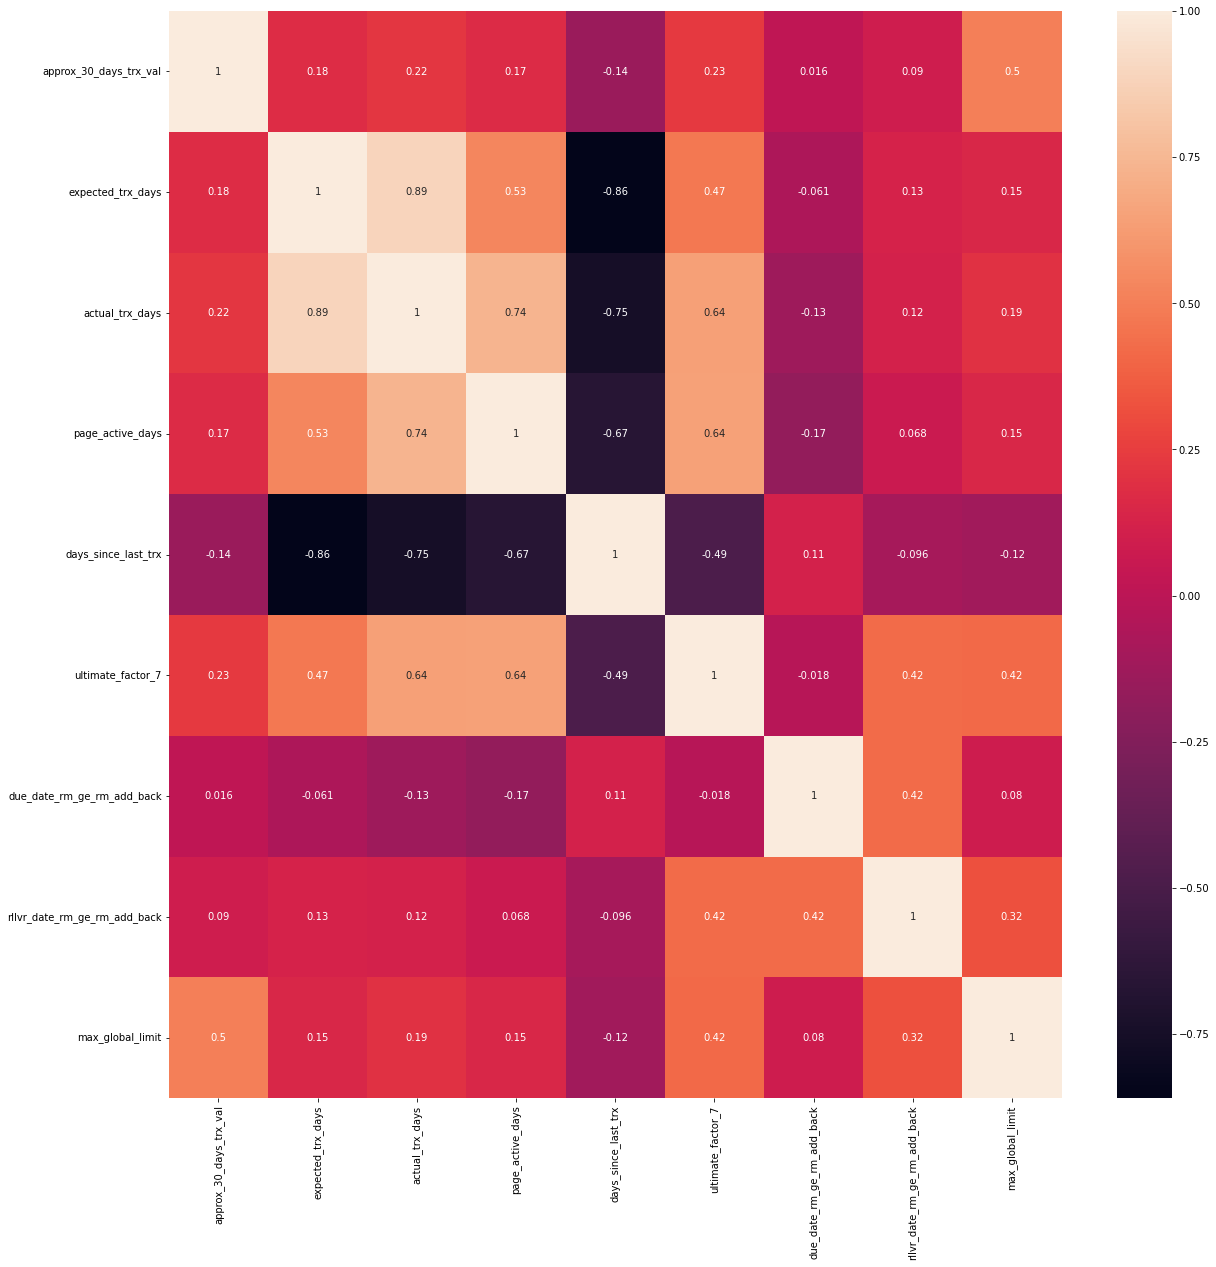

In [66]:
#Correlation analysis
correlations = summaries.corr()

f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

In [67]:
from sklearn.preprocessing import StandardScaler, normalize
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import joblib
import pyarrow as pa

In [68]:
# Let's scale the data first
scaler = StandardScaler()
summaries_scaled = scaler.fit_transform(summaries)

In [69]:
summaries_scaled.shape

(69312, 9)

In [70]:
summaries_scaled

array([[-0.30197632,  0.23206262, -0.34743282, ..., -0.9996538 ,
        -0.42120526, -0.25411853],
       [ 2.54427671,  0.60150156,  0.91113535, ..., -0.9996538 ,
        -0.42120526, -0.25411853],
       [-0.33673678, -0.78389444, -1.33630781, ..., -0.9996538 ,
        -0.42120526, -0.25411853],
       ...,
       [-0.32157717, -1.5227723 , -1.24641008, ..., -0.9996538 ,
        -0.42120526, -0.25411853],
       [-0.32422091,  0.41678209,  0.28185127, ..., -0.9996538 ,
        -0.42120526, -0.25411853],
       [ 0.22248689,  0.60150156,  0.55154444, ..., -0.9996538 ,
        -0.42120526,  0.36354833]])

In [71]:
scores_1 = []

range_values = range(1, 10)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(summaries_scaled)
    scores_1.append(kmeans.inertia_)

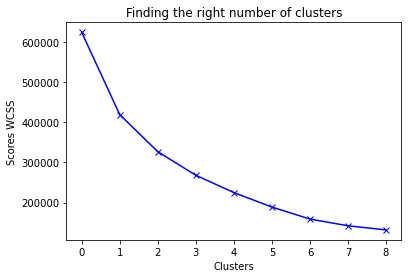

In [72]:
plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()

In [73]:
summaries_scaled

array([[-0.30197632,  0.23206262, -0.34743282, ..., -0.9996538 ,
        -0.42120526, -0.25411853],
       [ 2.54427671,  0.60150156,  0.91113535, ..., -0.9996538 ,
        -0.42120526, -0.25411853],
       [-0.33673678, -0.78389444, -1.33630781, ..., -0.9996538 ,
        -0.42120526, -0.25411853],
       ...,
       [-0.32157717, -1.5227723 , -1.24641008, ..., -0.9996538 ,
        -0.42120526, -0.25411853],
       [-0.32422091,  0.41678209,  0.28185127, ..., -0.9996538 ,
        -0.42120526, -0.25411853],
       [ 0.22248689,  0.60150156,  0.55154444, ..., -0.9996538 ,
        -0.42120526,  0.36354833]])

In [74]:
# Initialize the KMeans model
kmeans = KMeans(5)

# Fit the model to the dataframe
kmeans.fit(summaries_scaled)

# Get the cluster labels for each row in the dataframe
# labels = kmeans.predict(summaries_scaled)

# Add the labels as a new column to the dataframe
# summaries_scaled['cluster'] = labels

# summaries_scaled.head()

KMeans(n_clusters=5)

In [75]:
labels = kmeans.labels_

In [76]:
kmeans.cluster_centers_.shape

(5, 9)

In [77]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [summaries.columns])
# cluster_centers = cluster_centers.set_index('store_number')

cluster_centers 

,approx_30_days_trx_val,expected_trx_days,actual_trx_days,page_active_days,days_since_last_trx,ultimate_factor_7,due_date_rm_ge_rm_add_back,rllvr_date_rm_ge_rm_add_back,max_global_limit
0,4.017,0.591,0.809,0.623,-0.472,1.953,0.498,1.405,6.209
1,-0.316,-2.095,-1.750,-1.841,2.647,-1.173,0.255,-0.239,-0.253
2,0.014,0.527,0.626,0.474,-0.446,0.211,-0.393,-0.421,-0.135
3,-0.261,-0.658,-1.133,-0.572,0.086,-0.805,0.292,-0.256,-0.252
4,0.043,0.499,0.511,0.361,-0.417,1.160,1.000,2.369,0.319


In [78]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [summaries.columns])
cluster_centers


,approx_30_days_trx_val,expected_trx_days,actual_trx_days,page_active_days,days_since_last_trx,ultimate_factor_7,due_date_rm_ge_rm_add_back,rllvr_date_rm_ge_rm_add_back,max_global_limit
0,1550531.023,29.887,28.859,0.966,0.096,0.187,0.749,0.653,154859.173
1,9247.992,0.803,0.402,0.184,28.493,0.010,0.627,0.065,23.176
2,126725.540,29.198,26.823,0.918,0.332,0.088,0.303,-0.000,2850.323
3,28949.065,16.361,7.262,0.586,5.179,0.031,0.646,0.059,58.170
4,136748.630,28.895,25.548,0.882,0.600,0.142,1.000,0.998,13740.415


In [79]:
# Labels associated to each data point
print(labels.shape)
print(labels.max())
print(labels.min())

(69312,)
4
0


In [80]:
pd.DataFrame({'cluster':labels})

,cluster
0,3
1,2
2,3
3,2
4,2
...,...
69307,2
69308,2
69309,3
69310,2


In [81]:
# concatenate the clusters labels to our original dataframe
df_cluster = pd.concat([store_number, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster = pd.concat([summaries, df_cluster], axis = 1)
df_cluster.head()

,approx_30_days_trx_val,expected_trx_days,actual_trx_days,page_active_days,days_since_last_trx,ultimate_factor_7,due_date_rm_ge_rm_add_back,rllvr_date_rm_ge_rm_add_back,max_global_limit,store_number,loan_count,final_21_limit,final_7_limit,final_1_limit,previous_max_global_limit,idm_recommendation,cluster
0,14205.000,26,16,0.620,1.000,0.025,0,0,0,786152,0.000,0,0,0,0,Approve,3
1,1026565.760,30,30,1.000,0.000,0.075,0,0,0,165978,0.000,0,0,0,0,Approve,2
2,1841.333,15,5,0.330,2.000,0.000,0,0,0,772757,0.000,0,0,0,0,Approve,3
3,215717.637,30,30,1.000,0.000,0.053,0,0,0,745142,0.000,0,0,0,0,Reject,2
4,535443.407,30,30,1.000,0.000,0.112,0,0,0,510261,0.000,0,0,0,0,Approve,2


In [82]:
df_cluster.shape

(69312, 17)

In [83]:
# Save the model to a file
joblib.dump(kmeans, 'kmeans_model.joblib')

# Load the model from joblib file
loaded_model = joblib.load('kmeans_model.joblib')

# Convert the dataframe and the model to a parquet file
table = pa.Table.from_pandas(df_cluster)
model_parquet = pa.parquet.write_table(table, 'kmeans_model_data.parquet')


# You can later load the model using:
# loaded_model_parquet = pa.parquet.read_table('kmeans_model.parquet').to_pydict()

In [84]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69312 entries, 0 to 69311
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   approx_30_days_trx_val        69312 non-null  float64
 1   expected_trx_days             69312 non-null  int64  
 2   actual_trx_days               69312 non-null  int64  
 3   page_active_days              69312 non-null  float64
 4   days_since_last_trx           69312 non-null  float64
 5   ultimate_factor_7             69312 non-null  float64
 6   due_date_rm_ge_rm_add_back    69312 non-null  int64  
 7   rllvr_date_rm_ge_rm_add_back  69312 non-null  int64  
 8   max_global_limit              69312 non-null  int64  
 9   store_number                  69312 non-null  object 
 10  loan_count                    69312 non-null  float64
 11  final_21_limit                69312 non-null  int64  
 12  final_7_limit                 69312 non-null  int64  
 13  f

In [85]:
df_cluster['cluster'].value_counts()

2    38130
3    14124
4     8299
1     7479
0     1280
Name: cluster, dtype: int64

In [86]:
# # Plot the histogram of various clusters
# for i in with_limits_s.columns:
#     plt.figure(figsize = (35, 5))
#     for j in range(5):
#         plt.subplot(1,8,j+1)
#         cluster = df_cluster[df_cluster['cluster'] == j]
#         cluster[i].hist(bins = 20)
#         plt.title('{}    \nCluster {} '.format(i,j))
#         plt.show()

In [87]:
# Obtain the principal components
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(summaries_scaled)
principal_comp

array([[-0.5617898 , -1.08444035],
       [ 1.56444474, -0.44177844],
       [-2.06332009, -0.72408302],
       ...,
       [-0.94728633, -0.61162278],
       [ 0.39945039, -1.18490773],
       [ 1.29395119, -0.59810019]])

In [88]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-0.562,-1.084
1,1.564,-0.442
2,-2.063,-0.724
3,1.014,-1.245
4,1.586,-0.754


In [89]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-0.562,-1.084,3
1,1.564,-0.442,2
2,-2.063,-0.724,3
3,1.014,-1.245,2
4,1.586,-0.754,2


/tmp/ipykernel_277810/4149736210.py:3: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','brown'])


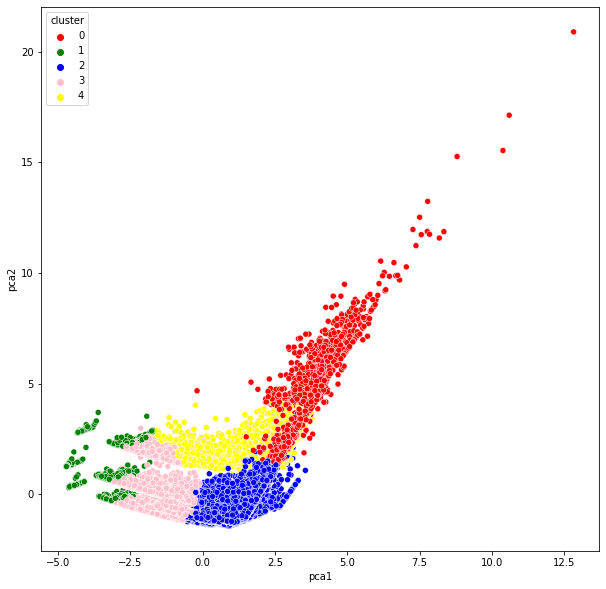

In [90]:
# Plot pca
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','brown'])
plt.show()

In [91]:
df_clusters = pd.merge(df_cluster, exp_by_dd, on='store_number', how = 'left')

df_clusters.head()

,approx_30_days_trx_val,expected_trx_days,actual_trx_days,page_active_days,days_since_last_trx,ultimate_factor_7,due_date_rm_ge_rm_add_back,rllvr_date_rm_ge_rm_add_back,max_global_limit,store_number,loan_count,final_21_limit,final_7_limit,final_1_limit,previous_max_global_limit,idm_recommendation,cluster,repayments_by_dd_vs_principal_mean,repayments_by_erd_vs_principal_mean,repayments_by_dpd30_vs_principal_mean,repayments_by_dpd90_vs_principal_mean
0,14205.000,26,16,0.620,1.000,0.025,0,0,0,786152,0.000,0,0,0,0,Approve,3,NaN,NaN,NaN,NaN
1,1026565.760,30,30,1.000,0.000,0.075,0,0,0,165978,0.000,0,0,0,0,Approve,2,NaN,NaN,NaN,NaN
2,1841.333,15,5,0.330,2.000,0.000,0,0,0,772757,0.000,0,0,0,0,Approve,3,NaN,NaN,NaN,NaN
3,215717.637,30,30,1.000,0.000,0.053,0,0,0,745142,0.000,0,0,0,0,Reject,2,NaN,NaN,NaN,NaN
4,535443.407,30,30,1.000,0.000,0.112,0,0,0,510261,0.000,0,0,0,0,Approve,2,NaN,NaN,NaN,NaN


In [92]:
df_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69312 entries, 0 to 69311
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   approx_30_days_trx_val                 69312 non-null  float64
 1   expected_trx_days                      69312 non-null  int64  
 2   actual_trx_days                        69312 non-null  int64  
 3   page_active_days                       69312 non-null  float64
 4   days_since_last_trx                    69312 non-null  float64
 5   ultimate_factor_7                      69312 non-null  float64
 6   due_date_rm_ge_rm_add_back             69312 non-null  int64  
 7   rllvr_date_rm_ge_rm_add_back           69312 non-null  int64  
 8   max_global_limit                       69312 non-null  int64  
 9   store_number                           69312 non-null  object 
 10  loan_count                             69312 non-null  float64
 11  fi

In [93]:
cluster_1 = df_clusters[df_clusters['cluster'] == 0]
cluster_1_with_loans = cluster_1[cluster_1['loan_count'] > 0]
cluster_1_without_loans = cluster_1[cluster_1['loan_count'] == 0]

c1_ratio_by_dd = cluster_1_with_loans['repayments_by_dd_vs_principal_mean'].mean()
c1_ratio_by_erd = cluster_1_with_loans['repayments_by_erd_vs_principal_mean'].mean()
c1_ratio_by_dpd30 = cluster_1_with_loans['repayments_by_dpd30_vs_principal_mean'].mean()
c1_ratio_by_dpd90 = cluster_1_with_loans['repayments_by_dpd90_vs_principal_mean'].mean()


cluster_1_without_loans['repayments_by_dd_vs_principal_mean'] = cluster_1_without_loans['repayments_by_dd_vs_principal_mean'].fillna(c1_ratio_by_dd)
cluster_1_without_loans['repayments_by_erd_vs_principal_mean'] = cluster_1_without_loans['repayments_by_erd_vs_principal_mean'].fillna(c1_ratio_by_erd)
cluster_1_without_loans['repayments_by_dpd30_vs_principal_mean'] = cluster_1_without_loans['repayments_by_dpd30_vs_principal_mean'].fillna(c1_ratio_by_dpd30)
cluster_1_without_loans['repayments_by_dpd90_vs_principal_mean'] = cluster_1_without_loans['repayments_by_dpd90_vs_principal_mean'].fillna(c1_ratio_by_dpd90)

cluster_1_cons = pd.concat([cluster_1_with_loans, cluster_1_without_loans], axis = 0)

cluster_1_cons[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].mean()

/tmp/ipykernel_277810/3750624935.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_without_loans['repayments_by_dd_vs_principal_mean'] = cluster_1_without_loans['repayments_by_dd_vs_principal_mean'].fillna(c1_ratio_by_dd)
/tmp/ipykernel_277810/3750624935.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_without_loans['repayments_by_erd_vs_principal_mean'] = cluster_1_without_loans['repayments_by_erd_vs_principal_mean'].fillna(c1_ratio_by_erd)
/tmp/ipykernel_277810/3750624935.py:13:

repayments_by_dd_vs_principal_mean      0.950
repayments_by_erd_vs_principal_mean     1.027
repayments_by_dpd30_vs_principal_mean   1.050
repayments_by_dpd90_vs_principal_mean   1.055
dtype: float64

In [94]:
print(c1_ratio_by_dd)
print(c1_ratio_by_erd)
print(c1_ratio_by_dpd30)
print(c1_ratio_by_dpd90)

0.949567865728921
1.026767262822425
1.0502564671638535
1.054529654687466


In [95]:
cluster_1_without_loans.head()

,approx_30_days_trx_val,expected_trx_days,actual_trx_days,page_active_days,days_since_last_trx,ultimate_factor_7,due_date_rm_ge_rm_add_back,rllvr_date_rm_ge_rm_add_back,max_global_limit,store_number,loan_count,final_21_limit,final_7_limit,final_1_limit,previous_max_global_limit,idm_recommendation,cluster,repayments_by_dd_vs_principal_mean,repayments_by_erd_vs_principal_mean,repayments_by_dpd30_vs_principal_mean,repayments_by_dpd90_vs_principal_mean
124,5819498.153,30,28,0.930,0.000,0.150,0,0,0,787999,0.000,0,0,0,0,Approve,0,0.950,1.027,1.050,1.055
1034,4171647.790,30,30,1.000,0.000,0.175,0,0,0,760455,0.000,0,0,0,0,Approve,0,0.950,1.027,1.050,1.055
1648,4722317.590,30,25,0.830,0.000,0.026,0,0,0,327408,0.000,0,0,0,0,Reject,0,0.950,1.027,1.050,1.055
3145,9478662.703,30,30,1.000,0.000,0.075,0,0,0,803750,0.000,0,0,0,0,Approve,0,0.950,1.027,1.050,1.055
3862,5087316.000,30,30,1.000,0.000,0.053,0,0,0,231770,0.000,0,0,0,0,Reject,0,0.950,1.027,1.050,1.055


In [96]:
cluster_2 = df_clusters[df_clusters['cluster'] == 1]
cluster_2_with_loans = cluster_2[cluster_2['loan_count'] > 0]
cluster_2_without_loans = cluster_2[cluster_2['loan_count'] == 0]

c2_ratio_by_dd = cluster_2_with_loans['repayments_by_dd_vs_principal_mean'].mean()
c2_ratio_by_erd = cluster_2_with_loans['repayments_by_erd_vs_principal_mean'].mean()
c2_ratio_by_dpd30 = cluster_2_with_loans['repayments_by_dpd30_vs_principal_mean'].mean()
c2_ratio_by_dpd90 = cluster_2_with_loans['repayments_by_dpd90_vs_principal_mean'].mean()


cluster_2_without_loans['repayments_by_dd_vs_principal_mean'] = cluster_2_without_loans['repayments_by_dd_vs_principal_mean'].fillna(c2_ratio_by_dd)
cluster_2_without_loans['repayments_by_erd_vs_principal_mean'] = cluster_2_without_loans['repayments_by_erd_vs_principal_mean'].fillna(c2_ratio_by_erd)
cluster_2_without_loans['repayments_by_dpd30_vs_principal_mean'] = cluster_2_without_loans['repayments_by_dpd30_vs_principal_mean'].fillna(c2_ratio_by_dpd30)
cluster_2_without_loans['repayments_by_dpd90_vs_principal_mean'] = cluster_2_without_loans['repayments_by_dpd90_vs_principal_mean'].fillna(c2_ratio_by_dpd90)

cluster_2_cons = pd.concat([cluster_2_with_loans, cluster_2_without_loans], axis = 0)

cluster_2_cons[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].mean()

/tmp/ipykernel_277810/925955535.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_2_without_loans['repayments_by_dd_vs_principal_mean'] = cluster_2_without_loans['repayments_by_dd_vs_principal_mean'].fillna(c2_ratio_by_dd)
/tmp/ipykernel_277810/925955535.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_2_without_loans['repayments_by_erd_vs_principal_mean'] = cluster_2_without_loans['repayments_by_erd_vs_principal_mean'].fillna(c2_ratio_by_erd)
/tmp/ipykernel_277810/925955535.py:13: Se

repayments_by_dd_vs_principal_mean      0.496
repayments_by_erd_vs_principal_mean     0.582
repayments_by_dpd30_vs_principal_mean   0.659
repayments_by_dpd90_vs_principal_mean   0.698
dtype: float64

In [97]:
print(c2_ratio_by_dd)
print(c2_ratio_by_erd)
print(c2_ratio_by_dpd30)
print(c2_ratio_by_dpd90)

0.49589775972960376
0.5822310580248927
0.6586465856616796
0.6976681536314777


In [98]:
cluster_3 = df_clusters[df_clusters['cluster'] == 2]
cluster_3_with_loans = cluster_3[cluster_3['loan_count'] > 0]
cluster_3_without_loans = cluster_3[cluster_3['loan_count'] == 0]

c3_ratio_by_dd = cluster_3_with_loans['repayments_by_dd_vs_principal_mean'].mean()
c3_ratio_by_erd = cluster_3_with_loans['repayments_by_erd_vs_principal_mean'].mean()
c3_ratio_by_dpd30 = cluster_3_with_loans['repayments_by_dpd30_vs_principal_mean'].mean()
c3_ratio_by_dpd90 = cluster_3_with_loans['repayments_by_dpd90_vs_principal_mean'].mean()


cluster_3_without_loans['repayments_by_dd_vs_principal_mean'] = cluster_3_without_loans['repayments_by_dd_vs_principal_mean'].fillna(c3_ratio_by_dd)
cluster_3_without_loans['repayments_by_erd_vs_principal_mean'] = cluster_3_without_loans['repayments_by_erd_vs_principal_mean'].fillna(c3_ratio_by_erd)
cluster_3_without_loans['repayments_by_dpd30_vs_principal_mean'] = cluster_3_without_loans['repayments_by_dpd30_vs_principal_mean'].fillna(c3_ratio_by_dpd30)
cluster_3_without_loans['repayments_by_dpd90_vs_principal_mean'] = cluster_3_without_loans['repayments_by_dpd90_vs_principal_mean'].fillna(c3_ratio_by_dpd90)

cluster_3_cons = pd.concat([cluster_3_with_loans, cluster_3_without_loans], axis = 0)

cluster_3_cons[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].mean()

/tmp/ipykernel_277810/2009814522.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_3_without_loans['repayments_by_dd_vs_principal_mean'] = cluster_3_without_loans['repayments_by_dd_vs_principal_mean'].fillna(c3_ratio_by_dd)
/tmp/ipykernel_277810/2009814522.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_3_without_loans['repayments_by_erd_vs_principal_mean'] = cluster_3_without_loans['repayments_by_erd_vs_principal_mean'].fillna(c3_ratio_by_erd)
/tmp/ipykernel_277810/2009814522.py:13:

repayments_by_dd_vs_principal_mean      0.531
repayments_by_erd_vs_principal_mean     0.628
repayments_by_dpd30_vs_principal_mean   0.750
repayments_by_dpd90_vs_principal_mean   0.809
dtype: float64

In [99]:
print(c3_ratio_by_dd)
print(c3_ratio_by_erd)
print(c3_ratio_by_dpd30)
print(c3_ratio_by_dpd90)

0.5314776337210412
0.6281213280312546
0.7495805366284335
0.8086074236987938


In [100]:
cluster_4 = df_clusters[df_clusters['cluster'] == 3]
cluster_4_with_loans = cluster_4[cluster_4['loan_count'] > 0]
cluster_4_without_loans = cluster_4[cluster_4['loan_count'] == 0]

c4_ratio_by_dd = cluster_4_with_loans['repayments_by_dd_vs_principal_mean'].mean()
c4_ratio_by_erd = cluster_4_with_loans['repayments_by_erd_vs_principal_mean'].mean()
c4_ratio_by_dpd30 = cluster_4_with_loans['repayments_by_dpd30_vs_principal_mean'].mean()
c4_ratio_by_dpd90 = cluster_4_with_loans['repayments_by_dpd90_vs_principal_mean'].mean()


cluster_4_without_loans['repayments_by_dd_vs_principal_mean'] = cluster_4_without_loans['repayments_by_dd_vs_principal_mean'].fillna(c4_ratio_by_dd)
cluster_4_without_loans['repayments_by_erd_vs_principal_mean'] = cluster_4_without_loans['repayments_by_erd_vs_principal_mean'].fillna(c4_ratio_by_erd)
cluster_4_without_loans['repayments_by_dpd30_vs_principal_mean'] = cluster_4_without_loans['repayments_by_dpd30_vs_principal_mean'].fillna(c4_ratio_by_dpd30)
cluster_4_without_loans['repayments_by_dpd90_vs_principal_mean'] = cluster_4_without_loans['repayments_by_dpd90_vs_principal_mean'].fillna(c4_ratio_by_dpd90)

cluster_4_cons = pd.concat([cluster_4_with_loans, cluster_4_without_loans], axis = 0)

cluster_4_cons[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].mean()

/tmp/ipykernel_277810/2183394851.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_4_without_loans['repayments_by_dd_vs_principal_mean'] = cluster_4_without_loans['repayments_by_dd_vs_principal_mean'].fillna(c4_ratio_by_dd)
/tmp/ipykernel_277810/2183394851.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_4_without_loans['repayments_by_erd_vs_principal_mean'] = cluster_4_without_loans['repayments_by_erd_vs_principal_mean'].fillna(c4_ratio_by_erd)
/tmp/ipykernel_277810/2183394851.py:13:

repayments_by_dd_vs_principal_mean      0.477
repayments_by_erd_vs_principal_mean     0.564
repayments_by_dpd30_vs_principal_mean   0.679
repayments_by_dpd90_vs_principal_mean   0.728
dtype: float64

In [101]:
print(c4_ratio_by_dd)
print(c4_ratio_by_erd)
print(c4_ratio_by_dpd30)
print(c4_ratio_by_dpd90)

0.47689978126285276
0.5644810849809988
0.6789355962759902
0.7279400908039093


In [102]:
cluster_5 = df_clusters[df_clusters['cluster'] == 4]
cluster_5_with_loans = cluster_5[cluster_5['loan_count'] > 0]
cluster_5_without_loans = cluster_5[cluster_5['loan_count'] == 0]

c5_ratio_by_dd = cluster_5_with_loans['repayments_by_dd_vs_principal_mean'].mean()
c5_ratio_by_erd = cluster_5_with_loans['repayments_by_erd_vs_principal_mean'].mean()
c5_ratio_by_dpd30 = cluster_5_with_loans['repayments_by_dpd30_vs_principal_mean'].mean()
c5_ratio_by_dpd90 = cluster_5_with_loans['repayments_by_dpd90_vs_principal_mean'].mean()


cluster_5_without_loans['repayments_by_dd_vs_principal_mean'] = cluster_5_without_loans['repayments_by_dd_vs_principal_mean'].fillna(c5_ratio_by_dd)
cluster_5_without_loans['repayments_by_erd_vs_principal_mean'] = cluster_5_without_loans['repayments_by_erd_vs_principal_mean'].fillna(c5_ratio_by_erd)
cluster_5_without_loans['repayments_by_dpd30_vs_principal_mean'] = cluster_5_without_loans['repayments_by_dpd30_vs_principal_mean'].fillna(c5_ratio_by_dpd30)
cluster_5_without_loans['repayments_by_dpd90_vs_principal_mean'] = cluster_5_without_loans['repayments_by_dpd90_vs_principal_mean'].fillna(c5_ratio_by_dpd90)

cluster_5_cons = pd.concat([cluster_5_with_loans, cluster_5_without_loans], axis = 0)

cluster_5_cons[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].mean()

repayments_by_dd_vs_principal_mean      0.893
repayments_by_erd_vs_principal_mean     1.028
repayments_by_dpd30_vs_principal_mean   1.044
repayments_by_dpd90_vs_principal_mean   1.049
dtype: float64

In [103]:
print(c5_ratio_by_dd)
print(c5_ratio_by_erd)
print(c5_ratio_by_dpd30)
print(c5_ratio_by_dpd90)

0.8930058123940215
1.027740770825062
1.0440709664854926
1.0489873592155066


In [104]:
df = pd.concat([cluster_1_cons, cluster_2_cons, cluster_3_cons, cluster_4_cons, cluster_5_cons], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69312 entries, 9404 to 43793
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   approx_30_days_trx_val                 69312 non-null  float64
 1   expected_trx_days                      69312 non-null  int64  
 2   actual_trx_days                        69312 non-null  int64  
 3   page_active_days                       69312 non-null  float64
 4   days_since_last_trx                    69312 non-null  float64
 5   ultimate_factor_7                      69312 non-null  float64
 6   due_date_rm_ge_rm_add_back             69312 non-null  int64  
 7   rllvr_date_rm_ge_rm_add_back           69312 non-null  int64  
 8   max_global_limit                       69312 non-null  int64  
 9   store_number                           69312 non-null  object 
 10  loan_count                             69312 non-null  float64
 11 

In [105]:
df[['final_21_limit', 'final_7_limit', 'final_1_limit', 'max_global_limit']].sum()

final_21_limit      183042600
final_7_limit       355707000
final_1_limit       133889900
max_global_limit    422038600
dtype: int64

In [106]:
df[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].mean()

repayments_by_dd_vs_principal_mean      0.568
repayments_by_erd_vs_principal_mean     0.665
repayments_by_dpd30_vs_principal_mean   0.765
repayments_by_dpd90_vs_principal_mean   0.804
dtype: float64

In [107]:
old_with_limits = df[(df['loan_count'] > 0) & (df['max_global_limit'] > 0)]

old_with_limits.head()

,approx_30_days_trx_val,expected_trx_days,actual_trx_days,page_active_days,days_since_last_trx,ultimate_factor_7,due_date_rm_ge_rm_add_back,rllvr_date_rm_ge_rm_add_back,max_global_limit,store_number,loan_count,final_21_limit,final_7_limit,final_1_limit,previous_max_global_limit,idm_recommendation,cluster,repayments_by_dd_vs_principal_mean,repayments_by_erd_vs_principal_mean,repayments_by_dpd30_vs_principal_mean,repayments_by_dpd90_vs_principal_mean
24209,3662886.400,30,29,0.970,0.000,0.150,1,0,200000,7084709,17.000,200000,200000,200000,200000,Approve,0,0.845,0.968,0.968,0.968
25570,967429.263,30,30,1.000,0.000,0.150,1,0,200000,945539,5.000,200000,154700,154700,200000,Approve,0,1.011,1.011,1.039,1.045
30958,405333.047,30,30,1.000,0.000,0.275,1,1,111500,577305,11.000,0,111500,0,0,Approve,0,0.679,1.069,1.069,1.069
31080,504957.590,30,26,0.870,0.000,0.150,1,1,126300,772370,2.000,126300,50200,50200,50200,Approve,0,1.054,1.054,1.054,1.054
31086,363739.353,30,26,0.870,0.000,0.250,1,1,163700,816204,11.000,163700,91000,0,0,Approve,0,0.659,1.046,1.046,1.046


In [108]:
old_with_limits[['final_21_limit', 'final_7_limit', 'final_1_limit', 'max_global_limit']].sum()

final_21_limit      183042600
final_7_limit       212304000
final_1_limit       133889900
max_global_limit    278635600
dtype: int64

In [109]:
old_with_limits[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].mean()

repayments_by_dd_vs_principal_mean      0.908
repayments_by_erd_vs_principal_mean     1.015
repayments_by_dpd30_vs_principal_mean   1.043
repayments_by_dpd90_vs_principal_mean   1.047
dtype: float64

In [110]:
old_with_limits_approve = old_with_limits[old_with_limits['idm_recommendation'] == 'Approve']

old_with_limits_approve[['final_21_limit', 'final_7_limit', 'final_1_limit', 'max_global_limit']].sum()

final_21_limit      127236900
final_7_limit       129569900
final_1_limit        83793000
max_global_limit    172647600
dtype: int64

In [111]:
old_with_limits_approve[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].mean()

repayments_by_dd_vs_principal_mean      0.924
repayments_by_erd_vs_principal_mean     1.023
repayments_by_dpd30_vs_principal_mean   1.048
repayments_by_dpd90_vs_principal_mean   1.052
dtype: float64

In [112]:
old_with_limits_reject = old_with_limits[old_with_limits['idm_recommendation'] == 'Reject']

old_with_limits_reject[['final_21_limit', 'final_7_limit', 'final_1_limit', 'max_global_limit']].sum()

final_21_limit       55805700
final_7_limit        82734100
final_1_limit        50096900
max_global_limit    105988000
dtype: int64

In [113]:
old_with_limits_reject[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].mean()

repayments_by_dd_vs_principal_mean      0.893
repayments_by_erd_vs_principal_mean     1.008
repayments_by_dpd30_vs_principal_mean   1.038
repayments_by_dpd90_vs_principal_mean   1.041
dtype: float64

In [114]:
new_with_limits = df[(df['loan_count'] == 0) & (df['max_global_limit'] > 0)]

new_with_limits.head()

,approx_30_days_trx_val,expected_trx_days,actual_trx_days,page_active_days,days_since_last_trx,ultimate_factor_7,due_date_rm_ge_rm_add_back,rllvr_date_rm_ge_rm_add_back,max_global_limit,store_number,loan_count,final_21_limit,final_7_limit,final_1_limit,previous_max_global_limit,idm_recommendation,cluster,repayments_by_dd_vs_principal_mean,repayments_by_erd_vs_principal_mean,repayments_by_dpd30_vs_principal_mean,repayments_by_dpd90_vs_principal_mean
43796,1743914.657,30,30,1.000,0.000,0.125,0,0,117500,105714,0.000,0,117500,0,117500,Approve,0,0.950,1.027,1.050,1.055
43892,1372943.650,30,27,0.900,0.000,0.088,0,0,131400,140610,0.000,0,131400,0,131400,Reject,0,0.950,1.027,1.050,1.055
43897,3280010.580,30,30,1.000,0.000,0.125,0,0,200000,141761,0.000,0,200000,0,200000,Approve,0,0.950,1.027,1.050,1.055
43913,3766416.267,30,30,1.000,0.000,0.088,0,0,191700,148379,0.000,0,191700,0,191700,Reject,0,0.950,1.027,1.050,1.055
43915,985623.367,30,30,1.000,0.000,0.125,0,0,84600,148721,0.000,0,84600,0,84600,Approve,0,0.950,1.027,1.050,1.055


In [115]:
new_with_limits[['final_21_limit', 'final_7_limit', 'final_1_limit', 'max_global_limit']].sum()

final_21_limit              0
final_7_limit       143403000
final_1_limit               0
max_global_limit    143403000
dtype: int64

In [116]:
new_with_limits[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].mean()

repayments_by_dd_vs_principal_mean      0.541
repayments_by_erd_vs_principal_mean     0.637
repayments_by_dpd30_vs_principal_mean   0.756
repayments_by_dpd90_vs_principal_mean   0.813
dtype: float64

In [117]:
new_with_limits[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].describe().T

,count,mean,std,min,25%,50%,75%,max
repayments_by_dd_vs_principal_mean,12561.000,0.541,0.064,0.477,0.531,0.531,0.531,0.950
repayments_by_erd_vs_principal_mean,12561.000,0.637,0.061,0.564,0.628,0.628,0.628,1.027
repayments_by_dpd30_vs_principal_mean,12561.000,0.756,0.046,0.679,0.750,0.750,0.750,1.050
repayments_by_dpd90_vs_principal_mean,12561.000,0.813,0.038,0.728,0.809,0.809,0.809,1.055


In [118]:
new_with_limits.shape

(12561, 21)

In [119]:
new_with_limits.head()

,approx_30_days_trx_val,expected_trx_days,actual_trx_days,page_active_days,days_since_last_trx,ultimate_factor_7,due_date_rm_ge_rm_add_back,rllvr_date_rm_ge_rm_add_back,max_global_limit,store_number,loan_count,final_21_limit,final_7_limit,final_1_limit,previous_max_global_limit,idm_recommendation,cluster,repayments_by_dd_vs_principal_mean,repayments_by_erd_vs_principal_mean,repayments_by_dpd30_vs_principal_mean,repayments_by_dpd90_vs_principal_mean
43796,1743914.657,30,30,1.000,0.000,0.125,0,0,117500,105714,0.000,0,117500,0,117500,Approve,0,0.950,1.027,1.050,1.055
43892,1372943.650,30,27,0.900,0.000,0.088,0,0,131400,140610,0.000,0,131400,0,131400,Reject,0,0.950,1.027,1.050,1.055
43897,3280010.580,30,30,1.000,0.000,0.125,0,0,200000,141761,0.000,0,200000,0,200000,Approve,0,0.950,1.027,1.050,1.055
43913,3766416.267,30,30,1.000,0.000,0.088,0,0,191700,148379,0.000,0,191700,0,191700,Reject,0,0.950,1.027,1.050,1.055
43915,985623.367,30,30,1.000,0.000,0.125,0,0,84600,148721,0.000,0,84600,0,84600,Approve,0,0.950,1.027,1.050,1.055


In [120]:
new_with_limits_erd = new_with_limits[new_with_limits['repayments_by_erd_vs_principal_mean'] >= 1.02]

new_with_limits_erd[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].mean()

repayments_by_dd_vs_principal_mean      0.950
repayments_by_erd_vs_principal_mean     1.027
repayments_by_dpd30_vs_principal_mean   1.050
repayments_by_dpd90_vs_principal_mean   1.055
dtype: float64

In [121]:
new_with_limits_erd.shape

(297, 21)

In [122]:
new_with_limits_erd[['final_21_limit', 'final_7_limit', 'final_1_limit', 'max_global_limit']].sum()

final_21_limit             0
final_7_limit       39873100
final_1_limit              0
max_global_limit    39873100
dtype: int64

In [123]:
new_with_limits_erd_approve = new_with_limits_erd[new_with_limits_erd['idm_recommendation'] == 'Approve']

new_with_limits_erd_approve[['final_21_limit', 'final_7_limit', 'final_1_limit', 'max_global_limit']].sum()

final_21_limit             0
final_7_limit       28462100
final_1_limit              0
max_global_limit    28462100
dtype: int64

In [124]:
new_with_limits_erd_approve[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].mean()

repayments_by_dd_vs_principal_mean      0.950
repayments_by_erd_vs_principal_mean     1.027
repayments_by_dpd30_vs_principal_mean   1.050
repayments_by_dpd90_vs_principal_mean   1.055
dtype: float64

In [125]:
new_with_limits_erd_reject = new_with_limits_erd[new_with_limits_erd['idm_recommendation'] == 'Reject']

new_with_limits_erd_reject[['final_21_limit', 'final_7_limit', 'final_1_limit', 'max_global_limit']].sum()

final_21_limit             0
final_7_limit       11411000
final_1_limit              0
max_global_limit    11411000
dtype: int64

In [126]:
new_with_limits_erd_reject[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].mean()

repayments_by_dd_vs_principal_mean      0.950
repayments_by_erd_vs_principal_mean     1.027
repayments_by_dpd30_vs_principal_mean   1.050
repayments_by_dpd90_vs_principal_mean   1.055
dtype: float64

In [127]:
final_with_limits = pd.concat([old_with_limits, new_with_limits_erd], axis = 0)

final_with_limits.shape

(7058, 21)

In [128]:
final_with_limits[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].mean()

repayments_by_dd_vs_principal_mean      0.909
repayments_by_erd_vs_principal_mean     1.016
repayments_by_dpd30_vs_principal_mean   1.043
repayments_by_dpd90_vs_principal_mean   1.047
dtype: float64

In [129]:
final_with_limits[['final_21_limit', 'final_7_limit', 'final_1_limit', 'max_global_limit']].sum()

final_21_limit      183042600
final_7_limit       252177100
final_1_limit       133889900
max_global_limit    318508700
dtype: int64

In [130]:
final_with_limits_approve = final_with_limits[final_with_limits['idm_recommendation'] == 'Approve']

final_with_limits_approve[['final_21_limit', 'final_7_limit', 'final_1_limit', 'max_global_limit']].sum()

final_21_limit      127236900
final_7_limit       158032000
final_1_limit        83793000
max_global_limit    201109700
dtype: int64

In [131]:
final_with_limits_approve[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].mean()

repayments_by_dd_vs_principal_mean      0.926
repayments_by_erd_vs_principal_mean     1.024
repayments_by_dpd30_vs_principal_mean   1.048
repayments_by_dpd90_vs_principal_mean   1.053
dtype: float64

In [132]:
final_with_limits_reject = final_with_limits[final_with_limits['idm_recommendation'] == 'Reject']

final_with_limits_reject[['final_21_limit', 'final_7_limit', 'final_1_limit', 'max_global_limit']].sum()

final_21_limit       55805700
final_7_limit        94145100
final_1_limit        50096900
max_global_limit    117399000
dtype: int64

In [133]:
final_with_limits_reject[['repayments_by_dd_vs_principal_mean', 'repayments_by_erd_vs_principal_mean', 'repayments_by_dpd30_vs_principal_mean', 'repayments_by_dpd90_vs_principal_mean']].mean()

repayments_by_dd_vs_principal_mean      0.895
repayments_by_erd_vs_principal_mean     1.009
repayments_by_dpd30_vs_principal_mean   1.039
repayments_by_dpd90_vs_principal_mean   1.041
dtype: float64

In [134]:
# Create a sample dataframe
data = {'cluster': [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5], 'repayment_milestone': ['dd', 'erd', 'dpd30', 'dpd90', 'dd', 'erd', 'dpd30', 'dpd90', 'dd', 'erd', 'dpd30', 'dpd90', 'dd', 'erd', 'dpd30', 'dpd90', 'dd', 'erd', 'dpd30', 'dpd90'], 'hurdle_rate': [round(c1_ratio_by_dd, 3), round(c1_ratio_by_erd, 3), round(c1_ratio_by_dpd30, 3), round(c1_ratio_by_dpd90, 3), round(c2_ratio_by_dd, 3), round(c2_ratio_by_erd, 3), round(c2_ratio_by_dpd30, 3), round(c2_ratio_by_dpd90, 3), round(c3_ratio_by_dd, 3), round(c3_ratio_by_erd, 3), round(c3_ratio_by_dpd30, 3), round(c3_ratio_by_dpd90, 3), round(c4_ratio_by_dd, 3), round(c4_ratio_by_erd, 3), round(c4_ratio_by_dpd30, 3), round(c4_ratio_by_dpd90, 3), round(c5_ratio_by_dd, 3), round(c5_ratio_by_erd, 3), round(c5_ratio_by_dpd30, 3), round(c5_ratio_by_dpd90, 3)]}
hurdle_rates_pred = pd.DataFrame(data)


In [135]:
hurdle_rates_pred

,cluster,repayment_milestone,hurdle_rate
0,1,dd,0.950
1,1,erd,1.027
2,1,dpd30,1.050
3,1,dpd90,1.055
4,2,dd,0.496
5,2,erd,0.582
6,2,dpd30,0.659
7,2,dpd90,0.698
8,3,dd,0.531
9,3,erd,0.628


In [136]:
hurdle_rates_pred.to_parquet('hurdle_rates_pred.parquet')